In [50]:
from EDA.visualization import *
from EDA.folium import *
from Modeling.similarity import *
from Modeling.clustering import *

# 데이터 설명 

### 1) 버스정류장별 일별 시간별 승하차 승객수 데이터    
버스정류장별로 매일 시간당 승하차 승객수가 몇명인지 나타나 있는 데이터    
### 2) 버스정류장별 주변 인프라 데이터       
약 12000개의 버스정류장 별로 주변 인프라가 어떤 것이 있고, 몇개가 있는지 나타나 있는 데이터  

# 1. Feature Engineering


## 1-1. feature 가공 전 상관관계 확인 
버스 정류장별 주변 인프라 데이터에서 종속인 컬럼들을 확인

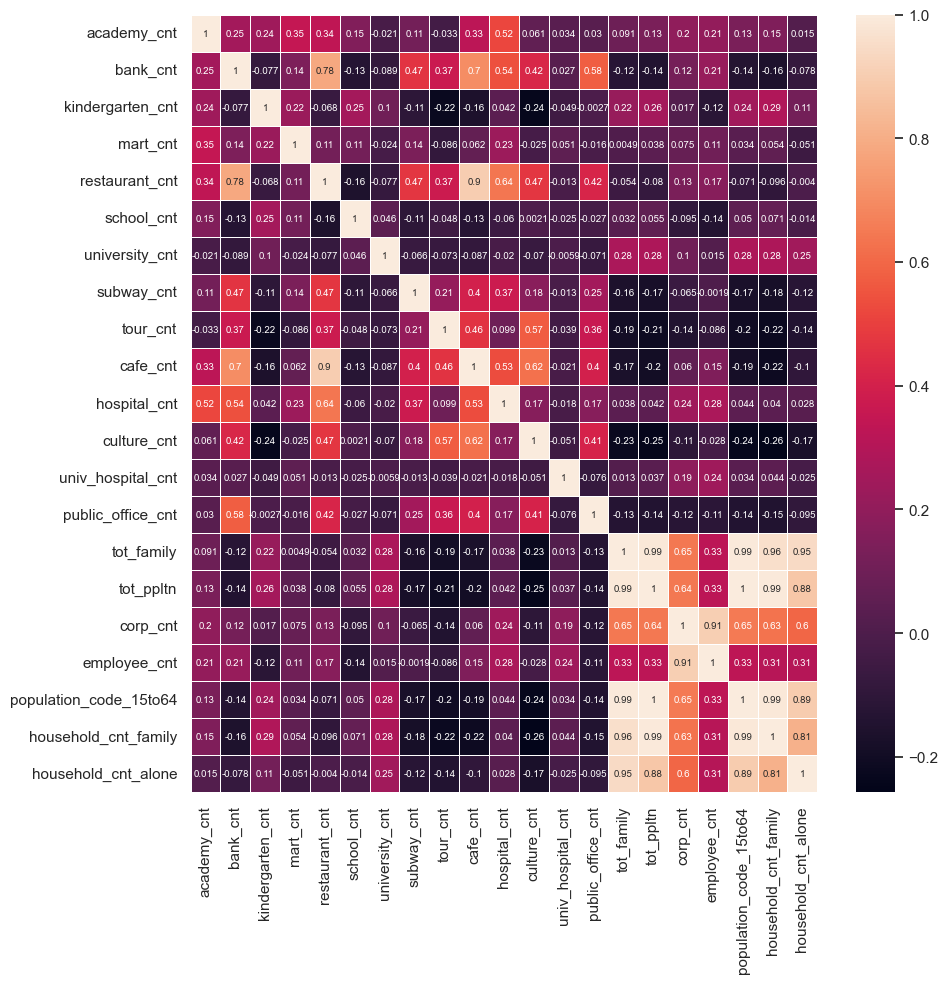

In [2]:
df_check1, df_check2 =get_heatmap_data()
get_heatmap(df_check1)

- 변수 간 상관관계 분석을 위해 heatmap 생성.  
- <u>통계 데이터</u>끼리 높은 상관관계를 보이는 경향 발견.
  - 통계 데이터: tot_family(총 가구수), tot_ppltn(총 인구수), corp_cnt(사업체 수), employee_cnt(종사자 수) 등등
- 통계 데이터는 인구, 사업체 관련 지역별 특징 추출을 위해 반드시 필요하므로 Feature Extraction을 통해 <u>특성을 조합</u>하여 상관관계를 낮춰보고자 함.

 ## 1-2. Feature Extraction 진행
 - `alone_ratio`
   - 식: household_cnt_alone(1인가구 수) / tot_family(총 가구 수)
   - 의미: 총 가구 수 대비 1인 가구 수 비율
 - `corp_emp_ratio`
   - 식: corp_cnt(사업체 수)/employee_cnt(종사자 수)
   - 의미: 한 사업체 당 종사자 수. 사업체 규모
   -  <style type="text/css">
      .tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
      .tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
        font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
      .tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
        font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
      .tg .tg-ma9z{border-color:#000000;font-family:"Lucida Sans Unicode", "Lucida Grande", sans-serif !important;font-size:13px;
        font-weight:bold;text-align:center;vertical-align:top}
      .tg .tg-xflk{border-color:#000000;font-family:"Lucida Sans Unicode", "Lucida Grande", sans-serif !important;font-size:13px;
        text-align:center;vertical-align:top}
      </style>
      <table class="tg">
      <thead>
        <tr>
          <th class="tg-ma9z">Feature</th>
          <th class="tg-ma9z">Extracted Feature</th>
          <th class="tg-ma9z">Extracted Feature <br>공식</th>
          <th class="tg-ma9z">Extracted Feature<br>의미</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td class="tg-xflk">household_alone_cnt<br>(1인가구 수)</td>
          <td class="tg-xflk" rowspan="2">alone_ratio</td>
          <td class="tg-xflk" rowspan="2">household_cnt_alone/<br>tot_family</td>
          <td class="tg-xflk" rowspan="2">총 가구 수 대비 <br>1인 가구 수 비율</td>
        </tr>
        <tr>
          <td class="tg-xflk">tot_family<br>(총 가구 수)</td>
        </tr>
        <tr>
          <td class="tg-xflk">corp_cnt<br>(총 사업체 수)</td>
          <td class="tg-xflk" rowspan="2">corp_emp_cnt</td>
          <td class="tg-xflk" rowspan="2">corp_cnt/employee_cnt</td>
          <td class="tg-xflk" rowspan="2">한 사업체 당 종사자 수.<br>사업체 규모.</td>
        </tr>
        <tr>
          <td class="tg-xflk">employee_cnt<br>(총 종사자 수)</td>
        </tr>
      </tbody>
      </table>

- 기존의 feature & Extracted feature와 중복된 의미를 지닌 feature → 제거
  - tot_ppltn (총 인구 수)
  - household_cnt_family (친족가구 수)


## 1-3. Feature Selection 진행
- alone_ratio, corp_emp_ratio 산출에 쓰였던 컬럼 중 타 변수들과 상관관계가 높은 변수들 제거.
    - household_cnt_alone, tot_ppltn, corp_cnt
- 그 후, heatmap 통해 상관관계 재확인.

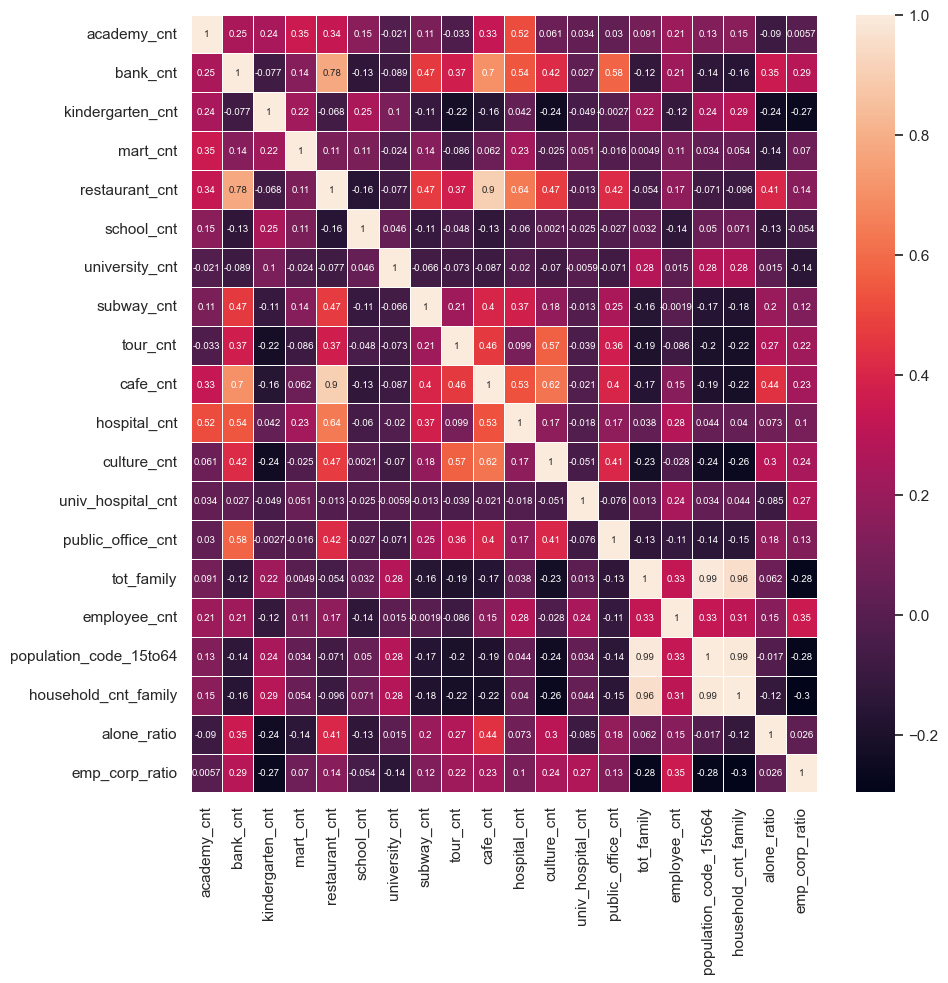

In [3]:
df = tb_infra_population
df['alone_ratio'] = df['household_cnt_alone']/df['tot_ppltn'] 
df['emp_corp_ratio'] = df['employee_cnt']/df['corp_cnt']

drop_col = ['household_cnt_alone','tot_ppltn','corp_cnt']
df = df.drop(drop_col,axis=1)

heatmap_col = ['academy_cnt', 'bank_cnt', 'kindergarten_cnt', 'mart_cnt',
       'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt',
       'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt',
       'univ_hospital_cnt', 'public_office_cnt', 'tot_family', 'employee_cnt',
       'population_code_15to64', 'household_cnt_family', 'alone_ratio',
       'emp_corp_ratio']
       
get_heatmap(df[heatmap_col])

- 잔존 변수 중, population_code_15to64(경제인구 수)는 지역별 특징 확인에 반드시 필요하다 생각.
- 따라서 <u>population_code_15to64와 상관관계가 높은 변수들</u> 제거.
  - tot_family, household_cnt_family
  - <style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Feature1</th>
    <th class="tg-7btt">Feature2</th>
    <th class="tg-7btt">상관계수</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow" rowspan="2">population_15to64<br>(경제활동인구)</td>
    <td class="tg-c3ow">tot_family</td>
    <td class="tg-c3ow">0.99</td>
  </tr>
  <tr>
    <td class="tg-c3ow">household_cnt_family</td>
    <td class="tg-c3ow">0.96</td>
  </tr>
</tbody>
</table>

## 1-4. 최종 feature들의 상관관계 확인

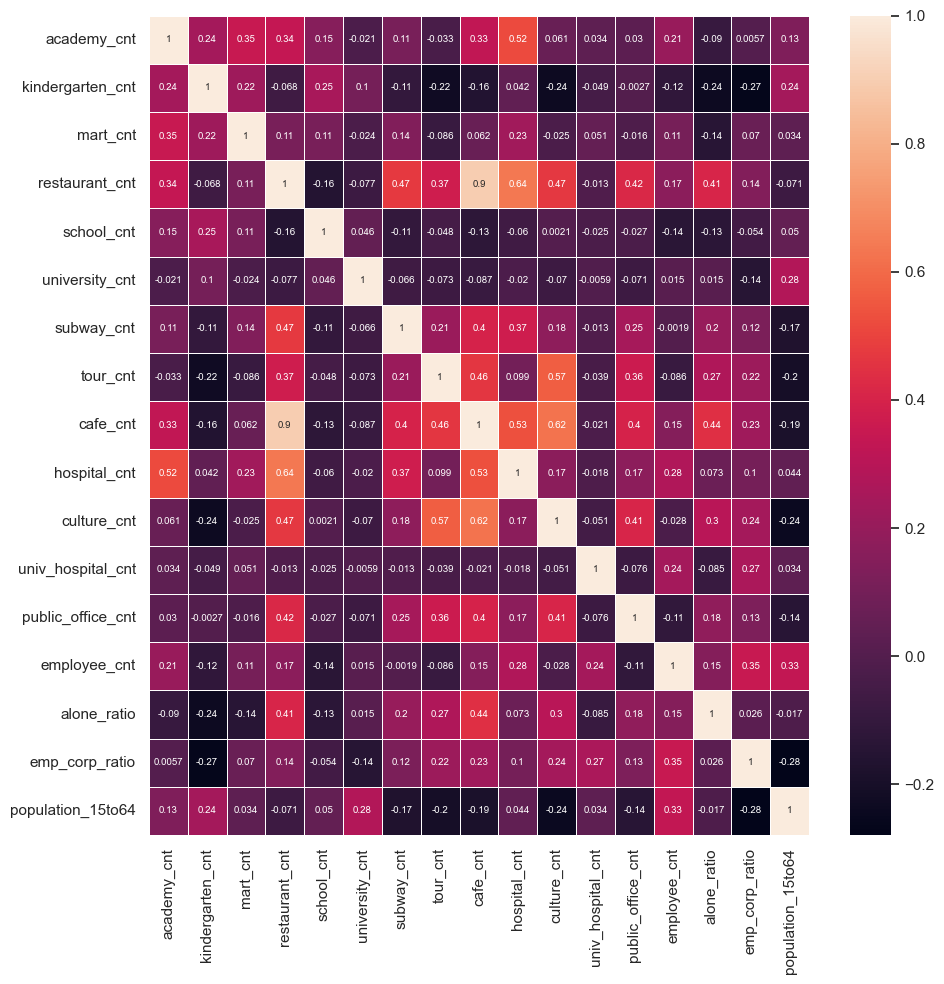

In [4]:
get_heatmap(df_check2)

### <분석 1 결과>
- feature 가공을 통해 대부분의 feature들의 상관관계를 0.7 미만으로 조정

# 2. 다람쥐 버스 정류장은 어느 구에 위치해 있는가?

In [5]:
df_daram = get_daram_95station_df()

In [6]:
df_daram_gu = df_daram.groupby('법정동_구').count()[['NODE_ID']]
df_daram_gu = df_daram_gu.sort_values(by='NODE_ID',ascending=False)

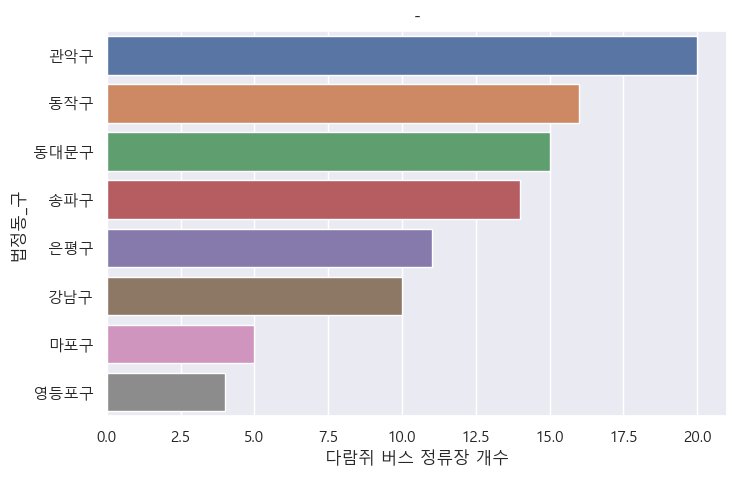

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8,5))
sns.barplot(x='NODE_ID', y=df_daram_gu.index, data =df_daram_gu).\
    set(title='-')
plt.xlabel('다람쥐 버스 정류장 개수')
plt.show();


In [8]:
df_ride_alight_gu = final_tb_infra_population.groupby(['법정동_구']).sum()[['RIDE_SUM_6_10','ALIGHT_SUM_6_10']]
df_ride_alight_gu = df_ride_alight_gu.sort_values(by='RIDE_SUM_6_10',ascending=False)

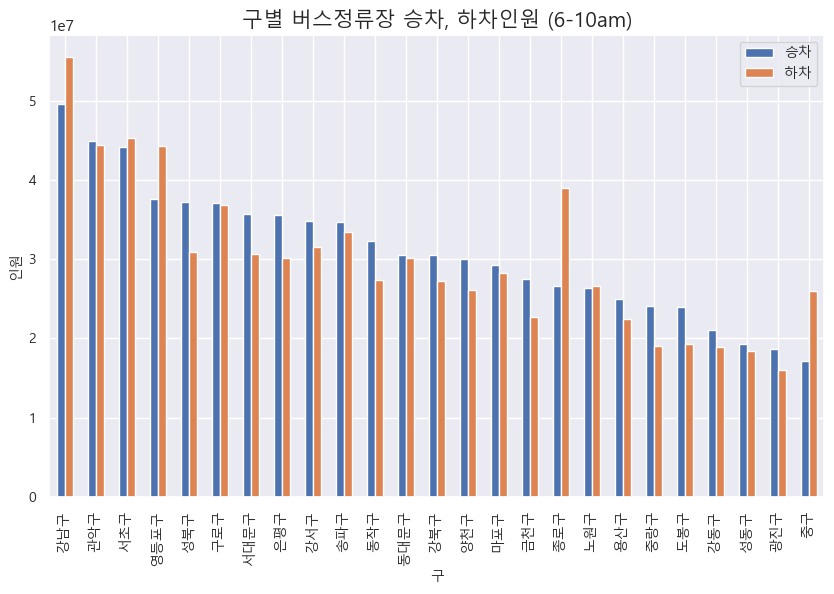

In [9]:
df_ride_alight_gu[['RIDE_SUM_6_10','ALIGHT_SUM_6_10']].plot.bar(figsize=(10,6))
plt.title('구별 버스정류장 승차, 하차인원 (6-10am)',fontsize=15)


plt.tick_params(axis='both', which='major', labelsize=10)

plt.xlabel('구', fontdict={'fontsize': 10})
plt.ylabel('인원', fontdict={'fontsize': 10})

plt.legend(['승차','하차'],fontsize=10)
plt.show()

#### <분석2 결론>
- 버스정류장이 많은 구가 승하차 승객수가 반드시 비례하지 않음을 알 수 있다.
- 위의 두 그래프를 비교해봤을 때, 다람쥐버스 정류장이 반드시 버스 승/하차 인원 수가 많은 순으로 설치되는 것은 아니라는 점을 알 수 있다.
- 즉, 버스 승/하차 인원수 외에 기타 요소들(인프라, 인구특성 등)이 버스 정류장 선정에 작용했을 것.
- 그러므로 기존 다람쥐 버스 정류장의 인프라, 인구특성을 파악하고, 이와 유사한 특성을 지닌 정류장을 새로운 다람쥐 버스 정류장으로 선정할 것.
<br></br>

- <u>기존 다람쥐 버스 정류장과는 다른 `새로운 구`  & 기존 다람쥐 버스 정류장과 `유사한 인프라, 인구 특성`을 지닐 것.</u>
- <u>유사도를 이용하여 기존 다람쥐 버스 정류장과 유사한 정류장을 탐색해야 한다.</u>
<b>


# 3. 다람쥐 버스 vs 일반 버스의 정류장 특징 비교

- ##### <b>🚩목적: 일반 버스 정류장과 다람쥐 버스 정류장을 비교하여, 다람쥐 버스 정류장이 다른 일반버스 정류장보다 두드러지게 갖고 있는 인프라, 인구 특성을 파악할 것.</b>
- 아래 두가지 타입의 정류장들의 평균적인 인프라, 인구 특징을 비교
  - 다람쥐 버스: 다람쥐 버스의 정류장(95개) 중 승/하차가 각각 많은 정류장 top 30개의 평균적인 인프라, 인구 수
  - 전체 버스: 일반 버스 정류장 (약 12,000개)의 평균적인 인프라, 인구 수

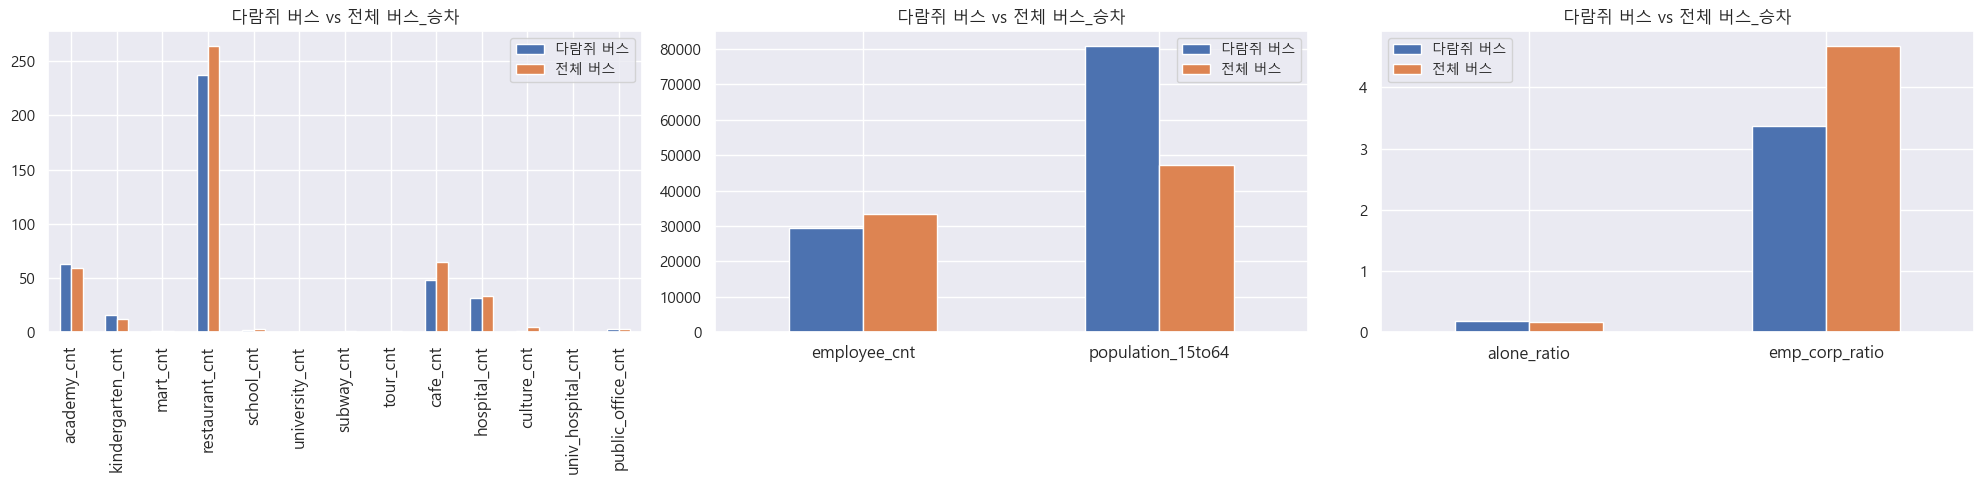

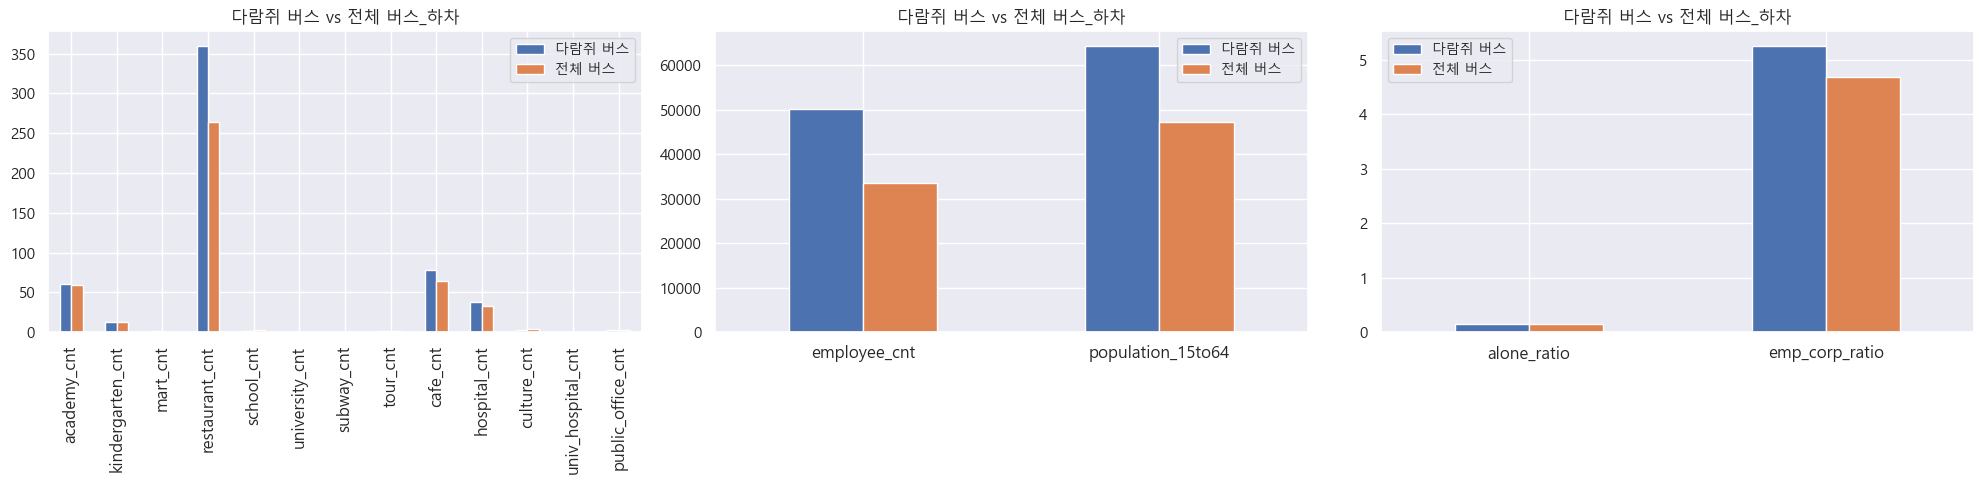

In [10]:
get_barplot_daram_vs_all()

#### <분석 3 결론>
1. 다람쥐 버스의 승차가 많은 지역의 특징
   - 인프라 특징: 학원, 유치원↑
   - 인구 특징: 15-64 경제인구 수 ↑
   - 종합: 거주지의 특징을 보임
 <br></br>
2. 다람쥐 버스의 하차가 많은 지역의 특징
   - 인프라 특징: 학원, 유치원, 병원, 식당, 카페↑
   - 인구 특징: 15-64 경제인구 수, 사업체 별 종사자 수, 종사자 수
   - 종합: 다양한 특징이 혼재
 <br></br>
3. 결론
   - 승차, 하차가 많은 지역의 두드러진 특징을 추출할 수 없었다.
   - 이유
     - 다람쥐 버스를 신설하려면 기점과 종점을 어느위치에 할 것인가가 중요함.
     - 상위 30개의 다람쥐 버스 정류장들은 기,종점이 아닌 정류장도 있기 때문에, 특징이 잘 나타나지 않음. 
   - 특징이 두드러지게 드러날 수 있도록 하는 분석이 필요하다.
   - 다람쥐 버스의 특징이 뚜렷하게 보이는 정류장 = 다람쥐 버스의 기점, 종점 
   - ⭐추후 분석 방향: 다람쥐 버스의 기점, 종점만의 특징을 분석

# 4. 다람쥐 버스의 기점, 종점 분석

In [11]:
tb_subway_month_addr = pd.read_csv(os.path.join(csv_path,'tb_subway_month_addr.csv'))
df_filtered = df_preprocess(tb_subway_month_addr)

## 4-1. "다람쥐 버스의 기점, 종점 - 승/하차 수 Top 30인 지하철 역" 과의 연관성

### 1) 승차

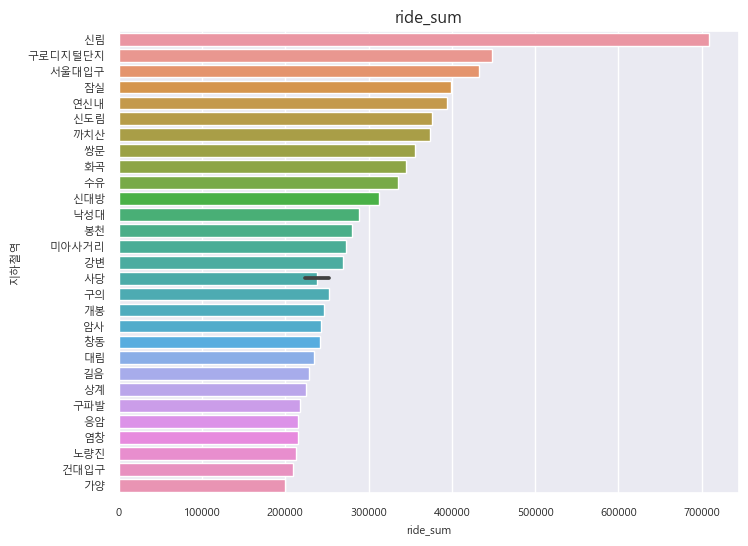

In [12]:
get_subway_barplot(df_filtered, 'ride_sum','지하철역', 'ride_sum')

### 2) 하차

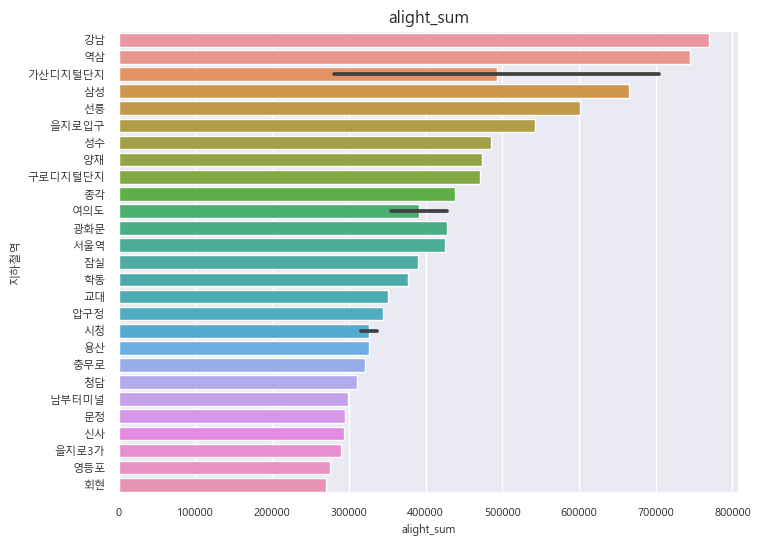

In [13]:
get_subway_barplot(df_filtered, 'alight_sum','지하철역', 'alight_sum')

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-trmu{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
.tg .tg-hfcq{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:14px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-hhed{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
</style>

<table class="tg">
<thead>
  <tr>
    <th class="tg-hfcq">노선명</th>
    <th class="tg-hfcq">기점, 종점</th>
    <th class="tg-hfcq">인근 역</th>
    <th class="tg-hfcq">다람쥐버스 정류장</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-trmu">8552</td>
    <td class="tg-trmu">종점</td>
    <td class="tg-trmu">신림</td>
    <td class="tg-trmu">신림사거리.신림역</td>
  </tr>
  <tr>
    <td class="tg-hhed">8331</td>
    <td class="tg-hhed">종점</td>
    <td class="tg-hhed">잠실</td>
    <td class="tg-hhed">잠실역 8번출구</td>
  </tr>
  <tr>
    <td class="tg-trmu">8551</td>
    <td class="tg-trmu">기점</td>
    <td class="tg-trmu">봉천</td>
    <td class="tg-trmu">봉천역</td>
  </tr>
  <tr>
    <td class="tg-hhed">8551</td>
    <td class="tg-hhed">종점</td>
    <td class="tg-hhed">노량진</td>
    <td class="tg-hhed">노량진역 3번출구</td>
  </tr>
</tbody>
</table>

- 다람쥐 버스의 기점, 종점 14개 중 4개만 승차 수 Top 30인 지하철역과 연관있음.

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-trmu{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
.tg .tg-hfcq{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:14px;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-hfcq">노선명</th>
    <th class="tg-hfcq">기점, 종점</th>
    <th class="tg-hfcq">인근 역</th>
    <th class="tg-hfcq">다람쥐버스 정류장</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-trmu">8331</td>
    <td class="tg-trmu">종점</td>
    <td class="tg-trmu">잠실</td>
    <td class="tg-trmu">잠실역 8번출구</td>
  </tr>
</tbody>
</table>

- 다람쥐 버스의 기점, 종점 14개 중 1개만 하차 수 Top 30인 지하철역과 연관있음.


#### <분석 4-1 결론>
- 다람쥐 버스의 기점, 종점이 반드시 승/하차 인구 수(유동인구 수)가 많은 지하철 역의 인근에 있는 것은 아니다.
- 즉, 다람쥐 버스의 기점, 종점을 선정할 때 유동인구가 절대적인 기준이 되지는 않는다.
<b>

## 4-2. 다람쥐 버스 기, 종점의 인프라, 인구 특징 분석

In [14]:
df_scaled = get_scaled_daram_df()

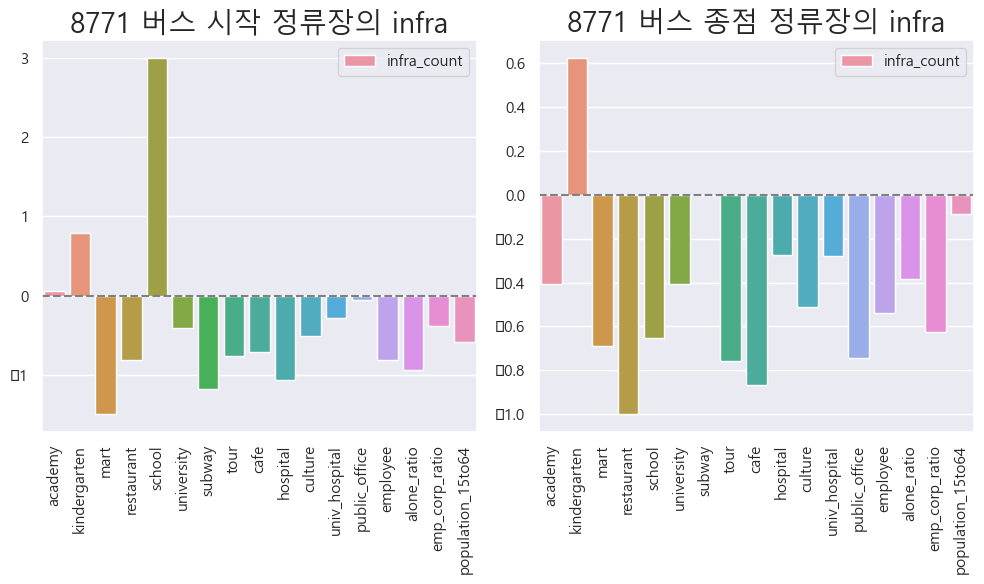

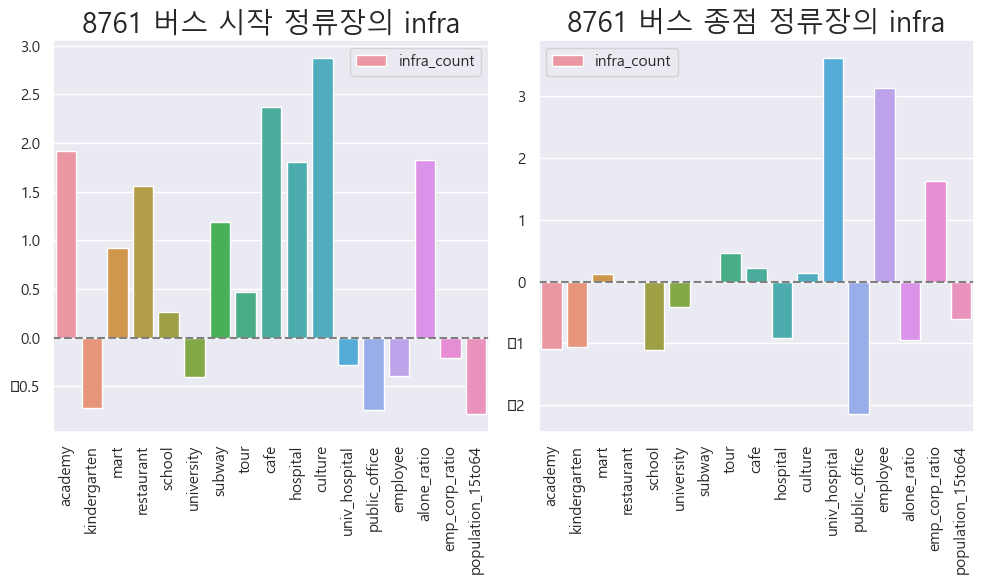

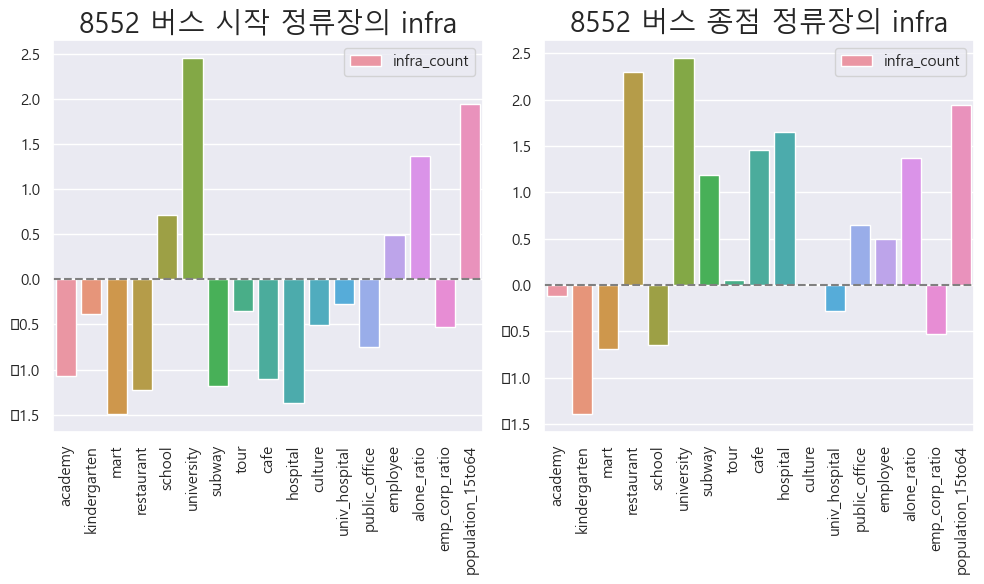

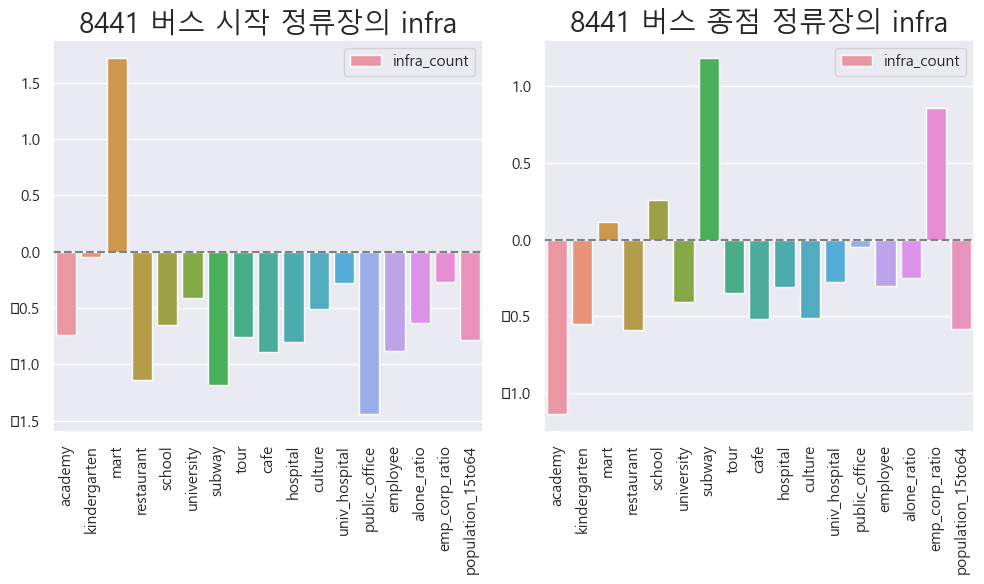

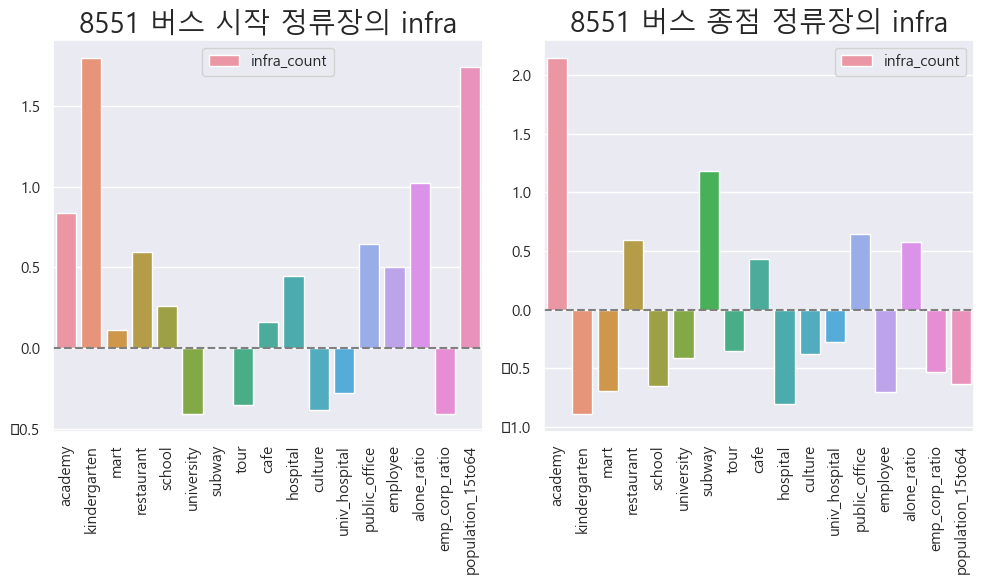

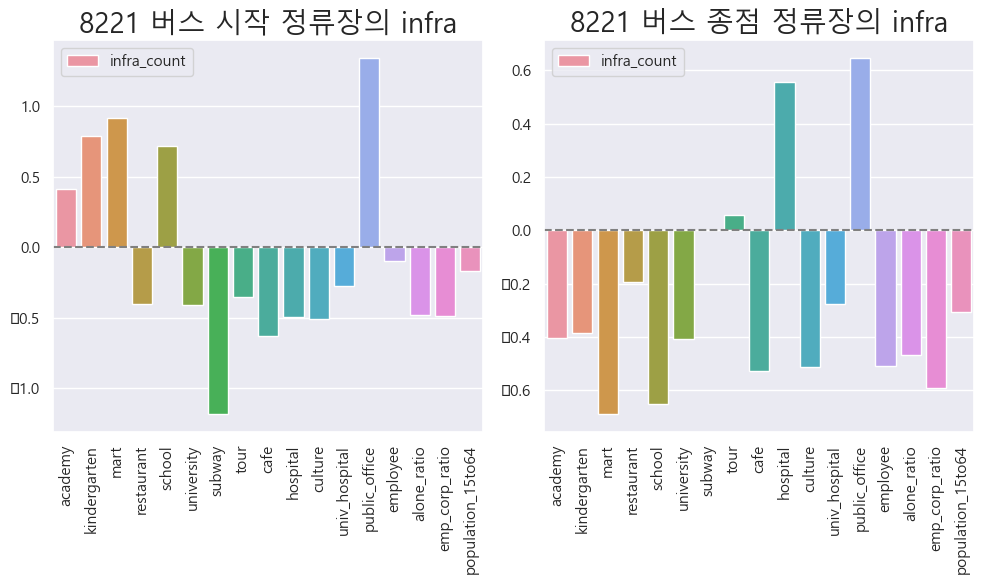

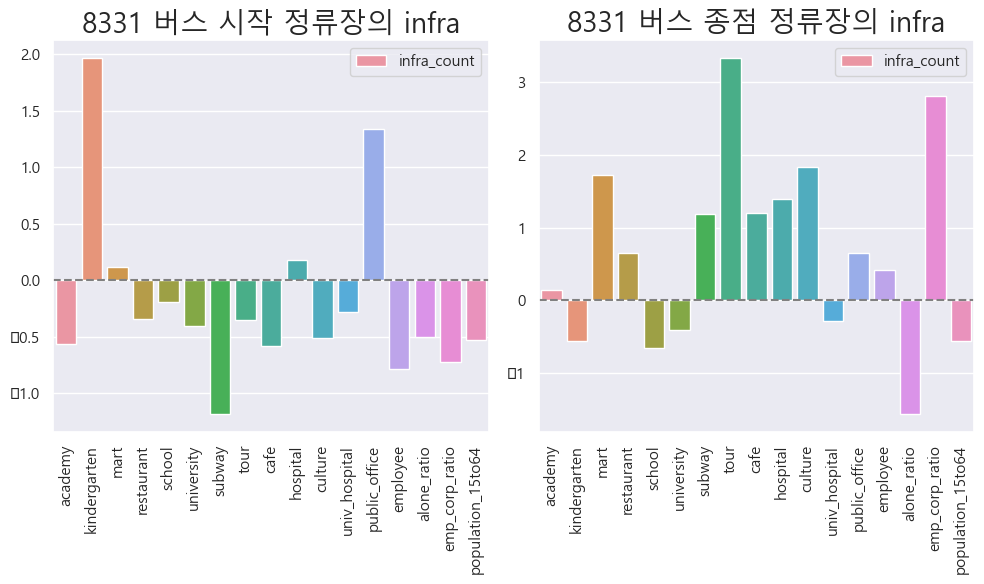

In [15]:
get_barplot_start_end(df_scaled)

#### <분석 4-2 결론>
<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-toki{border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;text-align:center;
  vertical-align:top}
.tg .tg-6532{background-color:#EBF3F9;border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;
  text-align:center;vertical-align:middle}
.tg .tg-cx9v{background-color:#ebf3f9;border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;
  font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-5cm9{background-color:#ffffff;border-color:#000000;font-family:Arial, Helvetica, sans-serif !important;font-size:12px;
  text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-6532"> <span style="font-weight:bold;color:black">노선</span> </th>
    <th class="tg-6532"> <span style="font-weight:bold;color:black">정류장   명</span></th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">위치</span></th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">인프라, 인구   특징</span>   </th>
    <th class="tg-cx9v"><br>인구 특징</th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">지하철역   수</span>   </th>
    <th class="tg-6532">   <br><span style="font-weight:bold;font-style:normal;color:black">지하철</span><br><span style="font-weight:bold;font-style:normal;color:black"> 총합</span>   </th>
    <th class="tg-6532"><span style="font-weight:bold;color:black">종합적인  특징</span></th>
    <th class="tg-6532"> <span style="font-weight:bold;color:black">운행</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-6532" rowspan="2"> <span style="font-weight:bold;color:black">8771</span></td>
    <td class="tg-5cm9"><span style="color:black">구산중</span></td>
    <td class="tg-5cm9"><span style="color:black">기점</span></td>
    <td class="tg-5cm9"><span style="color:black">초중고등학교 , 유치원, 학원</span></td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">1</span></td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"> <span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">녹번역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9"><span style="color:black">유치원</span></td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">1</span> </td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"><span style="font-weight:bold;color:black">8761</span></td>
    <td class="tg-5cm9"><span style="color:black">신촌역</span></td>
    <td class="tg-5cm9"><span style="color:black">기점</span> <br></td>
    <td class="tg-5cm9"><span style="color:black">문화시설,   cafe, 학원, 병원, 지하철</span>   </td>
    <td class="tg-toki">1인 가구 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">3</span></td>
    <td class="tg-5cm9"><span style="color:black">번화가</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">왕복</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">국회 의사당</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span> <br></td>
    <td class="tg-5cm9">대학병원, 관광지, 카페, 마트</td>
    <td class="tg-toki">종사자 수,<br>종사자수/사업체 수 비율</td>
    <td class="tg-5cm9"><span style="color:black">1</span></td>
    <td class="tg-5cm9"> <span style="color:black">업무지구</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"><span style="font-weight:bold;color:black">8552</span></td>
    <td class="tg-5cm9"><span style="color:black">신림복지관앞</span> </td>
    <td class="tg-5cm9"><span style="color:black">기점</span></td>
    <td class="tg-5cm9">  <span style="color:black">대학교,&nbsp;&nbsp;초중고등학교</span></td>
    <td class="tg-toki">경제활동 인구,<br>종사자 수, 1인 가구비율</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2">   <br><span style="font-weight:normal;font-style:normal;color:black">2</span>   </td>
    <td class="tg-5cm9"> <span style="color:black">대학가, 거주지</span>   </td>
    <td class="tg-5cm9" rowspan="2"> <span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">신림역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9">  <span style="color:black">대학교, 병원, 지하철, 공공기관</span></td>
    <td class="tg-toki">경제활동 인구,<br>1인가구 비율,<br>종사자 수</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">혼합</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"> <span style="font-weight:bold;color:black">8441</span></td>
    <td class="tg-5cm9"><span style="color:black">은곡마을</span></td>
    <td class="tg-5cm9"> <span style="color:black">기점</span></td>
    <td class="tg-5cm9"><span style="color:black">마트, 유치원</span>   </td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2">   <br><span style="font-weight:normal;font-style:normal;color:black">2</span>   </td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">수서역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9">지하철, 초중고등학교, 마트</td>
    <td class="tg-toki">종사자/ 사업체 수 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">교통허브</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2">&nbsp;&nbsp;&nbsp;<br><span style="font-weight:bold;font-style:normal;color:black">8551</span>&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-5cm9"><span style="color:black">봉천역</span></td>
    <td class="tg-5cm9"><span style="color:black">기점</span></td>
    <td class="tg-5cm9"> <span style="color:black">유치원, 공공기관, 학원, 초중고등학교, 학원</span>   </td>
    <td class="tg-toki">경제활동 인구 수,<br>1인가구 비율,<br>종사자 수</td>
    <td class="tg-5cm9"><span style="color:black">1</span></td>
    <td class="tg-5cm9" rowspan="2">   <br><span style="font-weight:normal;font-style:normal;color:black">3</span>   </td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"> <span style="color:black">왕복</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">노량진역</span></td>
    <td class="tg-5cm9"> <span style="color:black">종점</span></td>
    <td class="tg-5cm9">  <span style="color:black">학원, 지하철, 공공기관</span></td>
    <td class="tg-toki">1인가구 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">학원가, 번화가</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2"><span style="font-weight:bold;color:black">8221</span></td>
    <td class="tg-5cm9"><span style="color:black">장안2동</span>   <br><span style="font-weight:normal;font-style:normal;color:black">주민센터</span>   </td>
    <td class="tg-5cm9"> <span style="color:black">기점</span></td>
    <td class="tg-5cm9">   <span style="color:black">공공기관, 마트 ,유치원, 초중고등학교</span></td>
    <td class="tg-toki">-<br></td>
    <td class="tg-5cm9"> <span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">1</span></td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"> <span style="color:black">답십리역</span></td>
    <td class="tg-5cm9"> <span style="color:black">종점</span></td>
    <td class="tg-5cm9">  <span style="color:black">공공기관, 병원, 관광지</span>  </td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">1</span></td>
    <td class="tg-5cm9"><span style="color:black">번화가</span></td>
  </tr>
  <tr>
    <td class="tg-6532" rowspan="2">&nbsp;&nbsp;&nbsp;<br><span style="font-weight:bold;font-style:normal;color:black">8331</span>&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-5cm9"><span style="color:black">마천역</span></td>
    <td class="tg-5cm9"> <span style="color:black">기점</span></td>
    <td class="tg-5cm9"><span style="color:black">유치원, 공공기관, 병원, 마트</span>   <br></td>
    <td class="tg-toki">-</td>
    <td class="tg-5cm9"><span style="color:black">0</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">2</span></td>
    <td class="tg-5cm9"><span style="color:black">거주지</span></td>
    <td class="tg-5cm9" rowspan="2"><span style="color:black">편도</span></td>
  </tr>
  <tr>
    <td class="tg-5cm9"><span style="color:black">잠실역</span></td>
    <td class="tg-5cm9"><span style="color:black">종점</span></td>
    <td class="tg-5cm9"><span style="color:black">관광지, 문화시설, 병원, 지하철</span>  <br></td>
    <td class="tg-toki">종사자 수/ 사업체 수 비율</td>
    <td class="tg-5cm9"><span style="color:black">2</span></td>
    <td class="tg-5cm9"> <span style="color:black">번화가</span></td>
  </tr>
</tbody>
</table>

- 기존 다람쥐 버스의 유형은 크게 3가지로 나뉜다.
  - 거주지 - 거주지 (편도)
  - 번화가 - 번화가 (왕복)
  - 거주지 - 번화가 (편도, 왕복)
<br></br>
- __기존 다람쥐 버스 `기점`의 특징__
  - 인근 지하철역 수: 0~2개까지 다양하게 혼재
  - 인프라 특징: 
    - 인근 지하철역이 0개인 곳은 거주지 & 편도 운행의 특징을 지님
 <br></br>
- __기존 다람쥐 버스 `종점`의 특징__
  - 인근 지하철역 수: 모두 1개 이상
  - 인프라 특징: 거주지, 업무지구, 번화가 등 다양한 특징을 지님.
 <br></br>
- 종합
  - 기존 다람쥐 버스는 기점, 종점 인근(500m 이내)의 지하철 수의 합이 1개 이상이다.
  - 편도 노선은 기점이 거주지의 특성을 지님. 
  - 다람쥐 버스 유형
     - 편도: 대부분 주거지 - 지하철역 잇고 있음.
     - 왕복: 지하철역 - 지하철역 잇고 있음.
  - 대부분의 다람쥐 버스는 거주지에서 지하철로 승객을 수송하는 역할을 한다. 
- 종합적인 내용을 바탕으로 선정 기준을 산출할 수 있다.
<b></b>

- #### <b>✅선정 기준: 새로운 다람쥐 버스의 기점, 종점 인근에는 지하철이 1개 이상이어야 함 </b>

> ### EDA 중간정리 (기존 다람쥐 버스 분석)
> - 다람쥐 버스의 기점, 종점을 선정할 때 유동인구가 절대적인 기준이 되지는 않는다.
> - 정류장마다 인프라 특성이 다름.
> - 새로운 정류장의 인프라 특성은 기존 다람쥐 버스 정류장의 특성과 유사해야함(유사도이용할 것)
> - 다람쥐 버스 유형
>  - 편도: 대부분 주거지 - 지하철역 잇고 있음.
>  - 왕복: 지하철역 - 지하철역 잇고 있음.
> - ⭐기존 다람쥐 버스에 대해 분석한 내용을 바탕으로 새로운 노선 선정할 것.
>
<b>

# 5. 유사도 활용        
### 유사도를 활용해 다람쥐 버스 정류장과 비슷한 정류장 탐색     


In [16]:
import numpy as np
import pandas as pd 
from Modeling.similarity import *

## 5-1. 데이터 전처리 

데이터 설명     
1. `daram_df` : 다람쥐 버스가 지나가는 95개의 정류장 데이터  
   `reset_daram_df` : `daram_df` 인덱스 초기화     
2. `similarity_reset_daram_df` : `reset_daram_df`를 유사도에 사용할 수 있게, 인프라 컬럼들만 추출한 데이터      
3. `label_bus_df` : 다람쥐버스정류장은 1, 일반 버스 정류장은 0으로 라벨링한 데이터     
4. `original_bus_df` : 일반 버스 정류장 데이터     
   `reset_original_bus_df` : 인덱스를 초기화한 일반 버스 정류장 데이터

### 1) 데이터 가져오기 

In [17]:
# 다람쥐 버스 정류장 데이터 
daram_df =pd.read_csv('darambus.csv', encoding='UTF-8')
# 인덱스 초기화 
reset_daram_df = daram_df.reset_index()
# 유사도에 사용할 수 있게 데이터 프레임 만들기 
similarity_reset_daram_df = reset_daram_df.loc[:,'academy_cnt':'population_15to64']
# 라벨링된 전체 데이터 가져오기
label_bus_df = pd.read_csv('bus_labels.csv', encoding='UTF-8')  

In [18]:
# 전체 데이터에서 다람쥐버스 정류장만 제거하기
original_bus_df=label_bus_df[label_bus_df['Label']==0]
# 인덱스 리셋
reset_original_bus_df= original_bus_df.reset_index()

### 2) 다람쥐 버스 정류장과 기존 버스 정류장 전처리

### 2-1) 다람쥐 버스 정류장만 추출하기

In [19]:
# 다람쥐 버스 데이터 분할 
    # 1. 시작점과 끝점 데이터만 
start_station = [111000128,113000113,120000156,120000109,105000127,122000305,123000209]
end_station =   [111000291,118000048,119000024,120000018,105000072,122000302,123000043]

st_end_station_list = start_station + end_station

### 2-2) 다람쥐 버스가 지나가는 정류장만 추출하기 

In [20]:
st_end_daram_df=reset_daram_df[reset_daram_df['NODE_ID'].isin(st_end_station_list)]

### 3-1) 유사도에 쓰일 다람쥐 버스 정류장 (시작-종점) 데이터 프레임 만들기 : sim_st_daram_df : 14행

In [21]:
sim_st_end_daram_df=st_end_daram_df.loc[:,'academy_cnt':'population_15to64'] 

In [22]:
sim_st_end_daram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 5 to 94
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   academy_cnt        14 non-null     int64  
 1   kindergarten_cnt   14 non-null     int64  
 2   mart_cnt           14 non-null     int64  
 3   restaurant_cnt     14 non-null     int64  
 4   school_cnt         14 non-null     int64  
 5   university_cnt     14 non-null     int64  
 6   subway_cnt         14 non-null     int64  
 7   tour_cnt           14 non-null     int64  
 8   cafe_cnt           14 non-null     int64  
 9   hospital_cnt       14 non-null     int64  
 10  culture_cnt        14 non-null     int64  
 11  univ_hospital_cnt  14 non-null     int64  
 12  public_office_cnt  14 non-null     int64  
 13  employee_cnt       14 non-null     int64  
 14  alone_ratio        14 non-null     float64
 15  emp_corp_ratio     14 non-null     float64
 16  population_15to64  14 non-nu

### 3-2) 유사도에 쓰일 기존 버스 정류장 데이터 프레임만들기 : sim_reset_original_bus_df : 약 12000행

In [23]:
reset_original_bus_df.head(2)

index  Unnamed: 0    NODE_ID         정류소명         X좌표        Y좌표  \
0      0           0  100000001      종로2가사거리  126.987750  37.569765   
1      1           1  100000002  창경궁.서울대학교병원  126.996566  37.579183   

        법정동코드 법정동_구   법정동  academy_cnt  ...  culture_cnt  univ_hospital_cnt  \
0  1111013800   종로구  종로2가          185  ...           68                  0   
1  1111016600   종로구   연건동            2  ...           19                  0   

   public_office_cnt  employee_cnt  alone_ratio  emp_corp_ratio  \
0                 10          4091     0.401961        6.382215   
1                  1          5952     0.280998       10.553191   

   population_15to64  RIDE_SUM_6_10  ALIGHT_SUM_6_10  Label  
0                149          84743            52050      0  
1               1943         387688           712320      0  

[2 rows x 29 columns]

In [24]:
sim_reset_original_bus_df=reset_original_bus_df.loc[:,'academy_cnt':'population_15to64']

## 5-2. 유사도 이용하기 

### 1) 다람쥐 버스의 시작점과 끝점만 있는 정류장 : 14개   
: 유클라디안, 코사인 유사도 + 시각화 

##### eu : 유클라디안,  co : 코사인

- 유사도 데이터 추출

In [25]:
# 기본 자료 정리 : 기존 데이터와 유사한 데이터를 100개 추출할 것.
num_similar = 100
df_A = sim_st_end_daram_df
df_B = sim_reset_original_bus_df

# 유클라디안 : 앞에 eu로 표시
eu_similar_st_end_data = euclidean_similar_data(df_A, df_B, num_similar)

# 코사인 : 앞에 co로 표시
co_similar_st_end_data = cosine_similar_data(df_A, df_B, num_similar)

co_list=co_similar_st_end_data.index.values.tolist()


cosine_daram_df=pd.DataFrame()
for index,rows in reset_original_bus_df.iterrows():
    
    if index in co_list:
        cosine_daram_df=pd.concat([cosine_daram_df,rows], axis=1)   

cosine_daram_df=cosine_daram_df.T

# 유클라디안 인덱스를 추출 
eu_similar_st_end_index = eu_similar_st_end_data.index.values
eu_similar_st_end_index_list = eu_similar_st_end_index.tolist()
# 잘뽑았나 개수 확인~
print(len(eu_similar_st_end_index_list))

# 코사인 인덱스 추출 
co_similar_st_end_index = co_similar_st_end_data.index.values
co_similar_st_end_index_list = co_similar_st_end_index.tolist()
# 잘뽑았나 개수 확인~
print(len(eu_similar_st_end_index_list))

#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
eu_original_st_end_df=reset_original_bus_df.loc[eu_similar_st_end_index_list]
co_original_st_end_df=reset_original_bus_df.loc[co_similar_st_end_index_list]

1400
1400


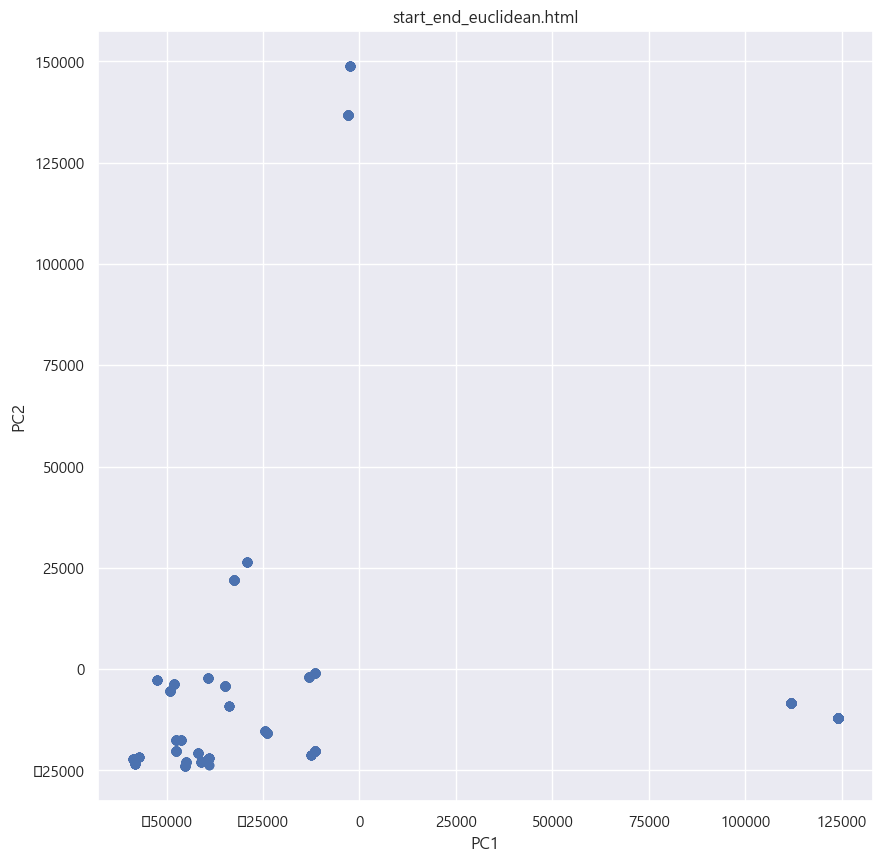

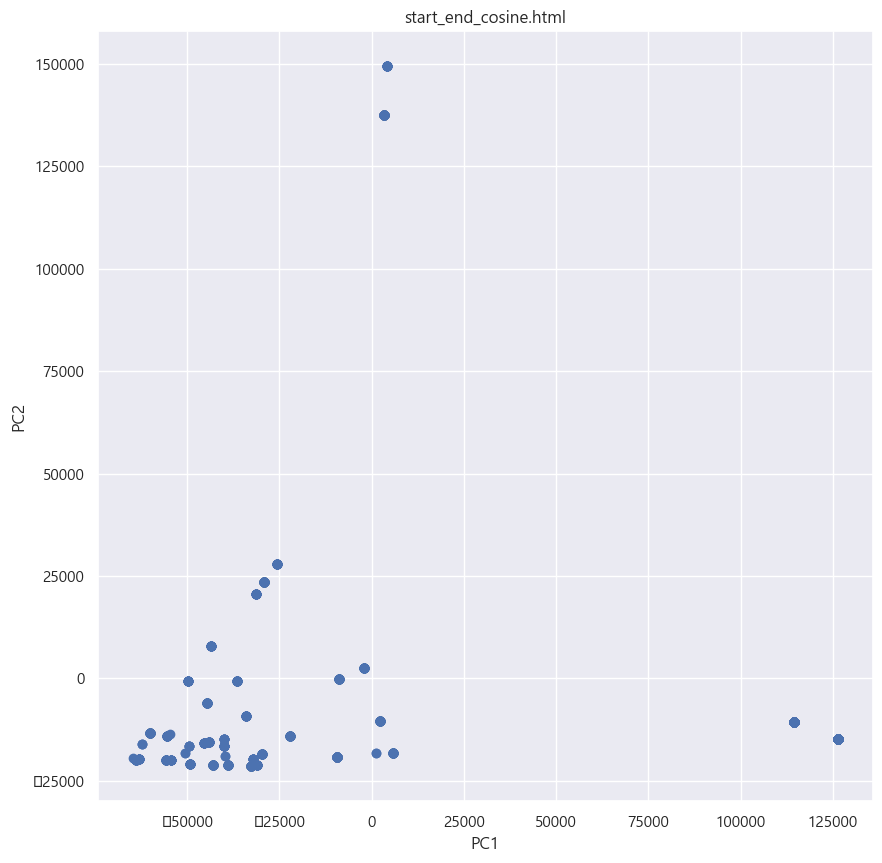

In [26]:
# 기점 종점 14개 유클라디안, 코사인 유사도 결과 시각화
visualize_similar_data('start_end_euclidean.html',eu_similar_st_end_data)
visualize_similar_data('start_end_cosine.html',co_similar_st_end_data)

- Folium에 시각화하기 

In [32]:
visualize_similar_data_on_map('14_eu_st_end_similarity.html',eu_original_st_end_df,daram_df)
visualize_similar_data_on_map('14_co_st_end_similarity.html',co_original_st_end_df,daram_df)

### 2) 다람쥐 버스 전체 정류장 : 95개    
: 유클라디안, 코사인 유사도 + 시각화 

In [28]:
num_similar = 30

df__A = similarity_reset_daram_df
df__B = sim_reset_original_bus_df
co_similar_data = cosine_similar_data(df__A, df__B, num_similar)

# 코사인 인덱스 추출 
co_similar_index = co_similar_data.index.values
co_similar_index_list = co_similar_index.tolist()

#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
co_original_df=reset_original_bus_df.loc[co_similar_index_list]

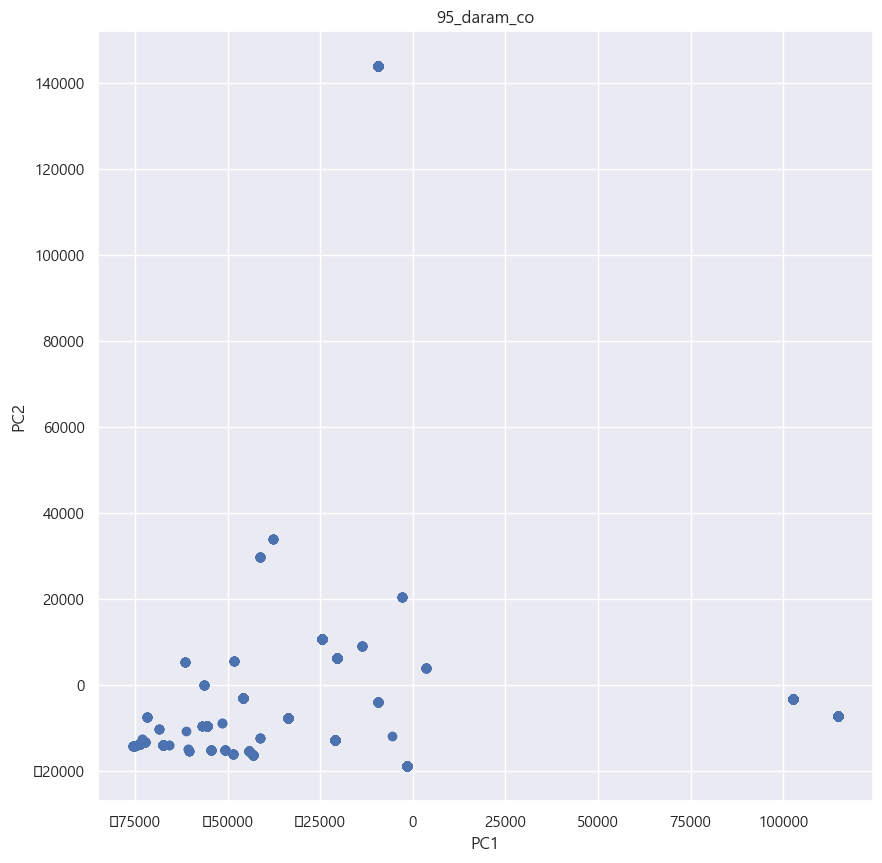

In [29]:
visualize_similar_data('95_daram_co',co_similar_data)

- Folium에 시각화 하기

In [30]:
visualize_similar_data_on_map('95_co_similarity.html',co_original_df,daram_df)

##### <다람쥐버스 14개의 시작점,종점 정류장 데이터와 95개의 다람쥐버스 전체 정류장 데이터를 비교한 결과>      
 
- 유클라디안 유사도 VS 코사인 유사도 [기점-종점 14개]     
PCA에서는 큰 차이가 없지만, FOlium에서14개의 데이터의 코사인 유사도가 유클라디안 유사도보다 더 기존의 정류장들과 일치하면서 새로운 정류장까지 더 잘 찾아내는 경향을 보임 .      
다람쥐 버스 정류장과 비슷한 특성을 가진 지역을 찾으려면 코사인 유사도가 더 적합하다고 판단   

- 코사인 유사도 95개 VS 14개  
유사도를 활용했을 때 14개 데이터가 95개 데이터보다 기존의 정류장들과 일치하면서 새로운 정류장까지 더 잘 찾아내는 경향을 보임 .     

| 14_euclidean  | 14_cosine   | 95_cosine   |
|---|---|---|
| <img src="PCA_eu_14.png" width="500">  | <img src="PCA_co_14.png" width="500"> |  <img src="PCA_co_95.png" width="500"> |
| <img src="folium_eu_14.png" width="500">  | <img src="folium_co_14.png" width="500"> | <img src="folium_co_95.png" width="500">  |

In [32]:
df_similar=co_original_st_end_df.drop(['Unnamed: 0','RIDE_SUM_6_10','ALIGHT_SUM_6_10'],axis=1)
df_similar.rename(columns={'Label':'station_label'}, inplace=True)
df_similar=df_similar.drop_duplicates()

## 6. Clustering

In [35]:
df_bus_not_daram = get_not_daram_station()

# numerical data만 추출
df_bus_not_daram_num = df_bus_not_daram.select_dtypes(include=['int','float'])

# df_daram_14: 다람쥐버스 기,종점(14개) 데이터프레임
df_daram_14 = get_daram_14_station_df()
df_daram_14 = preprocessing_cluster(df_daram_14)

# numerical data만 추출
df_daram_14_num = df_daram_14.select_dtypes(include=['int','float'])

<진행 순서>  
1. 서울의 기존 정류장들(약 12500개) 중 다람쥐 버스 정류장(95개)을 제외한 나머지 정류장들 중 기존 다람쥐 버스 정류장의 기점, 종점(14개)과 높은 유사도를 지닌 정류장을 100개씩 뽑아 총 1400 정류장으로 추림.
2. 추려진 정류장을 바탕으로 군집 진행하여 특성 파악 
- 코사인 유사도를 통해 추출한 1400개의 정류장을 군집.
- 사용기술:
    - Kmeans
    - GMM
    - DBscan

## 6-1. scaler & pca

### 1) scaler

In [41]:
df_similar_num = df_similar.select_dtypes(include=['int','float'])
df_similar_num = df_similar_num.reset_index(drop=True)
df_similar_num=df_similar_num.drop(['NODE_ID','X좌표','Y좌표','법정동코드'], axis=1)

drop_col = ['index','station_label']
df_similar_num = df_similar_num.drop(drop_col, axis =1)
df_similar_num.head()

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0           44                 9         1             333           1   
1           45                13         1             335           2   
2           47                10         1             345           1   
3           47                13         1             347           1   
4           47                 8         1             350           1   

   university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  culture_cnt  \
0               0           1         1        52            55            0   
1               0           1         1        55            52            0   
2               0           1         1        55            55            0   
3               0           1         2        55            59            0   
4               0           1         2        55            57            0   

   univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
0                  0                  3         18996     0.129167   
1                  0                  6         18996     0.129167   
2                  0                  3         18996     0.129167   
3                  0                  4         18996     0.129167   
4                  0                  3         18996     0.129167   

   emp_corp_ratio  population_15to64  
0        3.160732              40211  
1        3.160732              40211  
2        3.160732              40211  
3        3.160732              40211  
4        3.160732              40211

- boxplot으로 이상치 확인

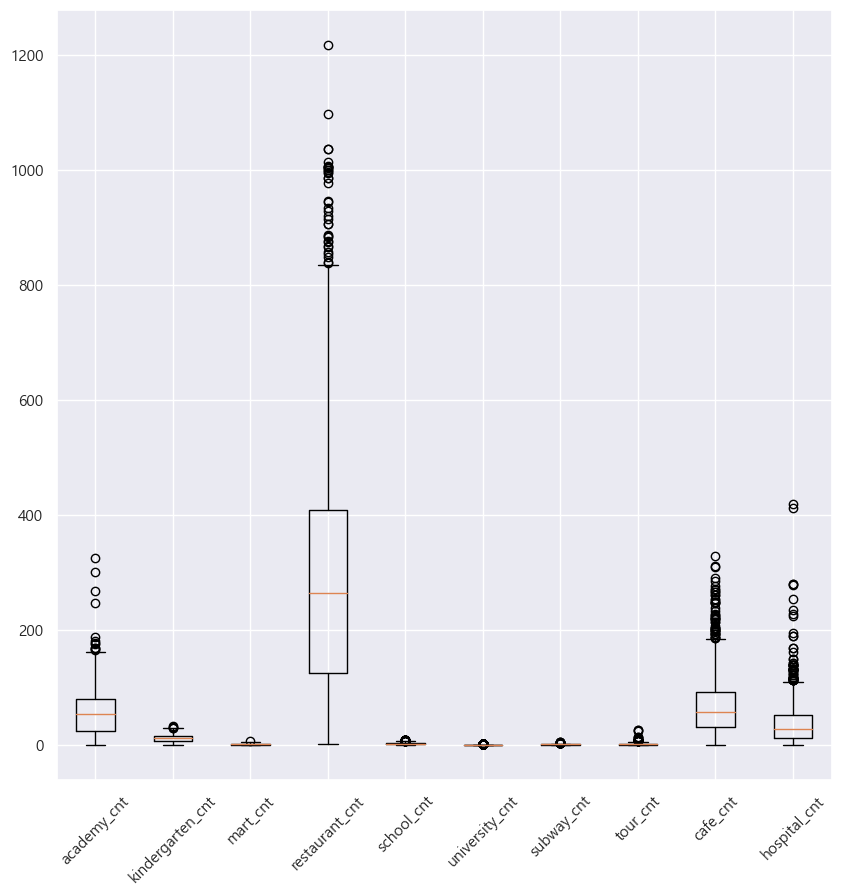

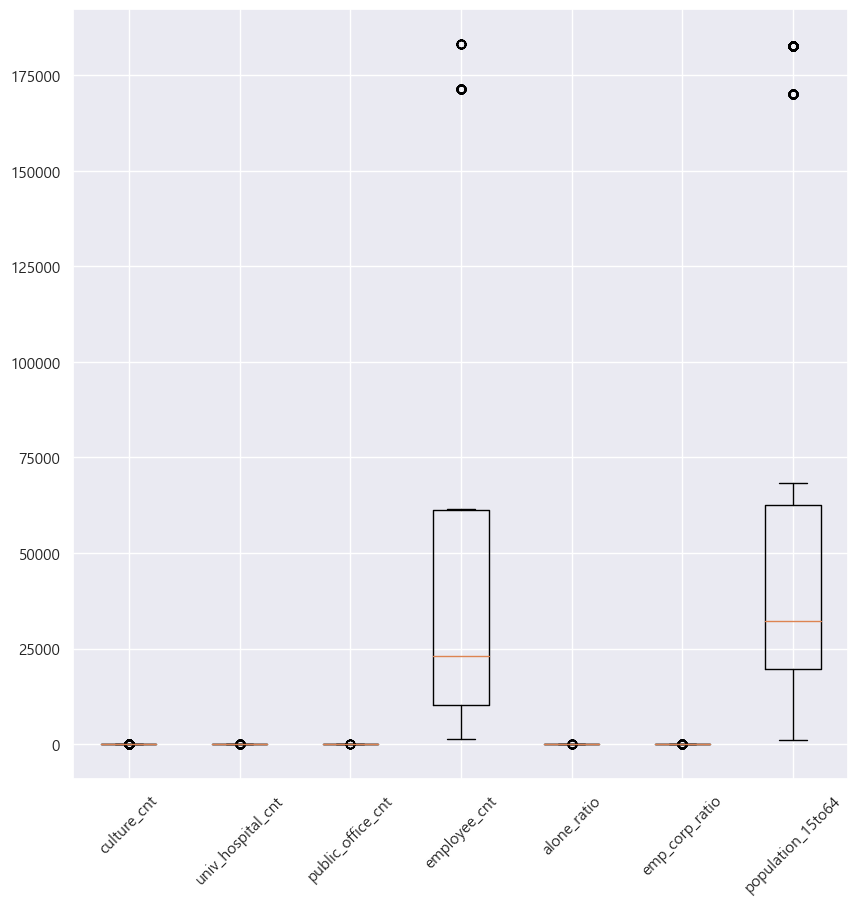

In [42]:
# Extract column names for each subset
subset1_columns = df_similar_num.columns[:10]
subset2_columns = df_similar_num.columns[10:]



plt.boxplot(df_similar_num.iloc[:, :10])
plt.xticks(range(1, len(subset1_columns) + 1), subset1_columns, rotation=45)
plt.show()


plt.boxplot(df_similar_num.iloc[:, 10:])
plt.xticks(range(1, len(subset2_columns) + 1), subset2_columns, rotation=45)
plt.show()

- 위의 boxplot을 살펴보면 academy, restaurant, hospital 등 이상치가 많은 데이터들이 있다.
- 중앙값과 IQR을 사용하여 이상치에 민감하지 않은 robust scaler를 사용했다.

In [43]:
df_robust = scaler(df_similar_num, 'robust')

### 2) PCA

- 현재 데이터는 17차원
- 데이터 피쳐 중 중요한 피처만 뽑아 모델의 설명력, 예측력을 더 높이기 위해 pca 선택


In [44]:
pca_explained_variance_ration(df_robust)

설명가능한 분산 비율(고윳값)       기여율    누적 기여율
pca_1           4.844769  0.316786  0.316786
pca_2           2.902126  0.189762  0.506548
pca_3           1.834720  0.119967  0.626515
pca_4           1.664089  0.108810  0.735325
pca_5           0.796443  0.052077  0.787403
pca_6           0.684906  0.044784  0.832187
pca_7           0.578047  0.037797  0.869984
pca_8           0.458740  0.029996  0.899979
pca_9           0.408462  0.026708  0.926687
pca_10          0.305056  0.019947  0.946634
pca_11          0.224290  0.014666  0.961300
pca_12          0.201397  0.013169  0.974469
pca_13          0.137236  0.008973  0.983442
pca_14          0.130201  0.008514  0.991956
pca_15          0.088751  0.005803  0.997759
pca_16          0.025186  0.001647  0.999406
pca_17          0.009088  0.000594  1.000000

- pca 차원 선택 기준 
    1. 누적 기여율 > 0.7

- 6차원으로 차원축소 결정

In [45]:
pca_6_df = func_pca(df_robust, 6)
pca_6_df

분산 설명력 :  0.8321866893736001


pca_1     pca_2     pca_3     pca_4     pca_5     pca_6
0    -0.707867 -0.299968 -0.787584 -0.055454  0.648526  0.995420
1    -0.630363 -0.176608 -1.352171 -0.415561  0.850213  0.171546
2    -0.687045 -0.279873 -0.864459 -0.078261  0.634682  0.987805
3    -0.544441 -0.167778 -1.101407 -0.077009  1.137501  0.738952
4    -0.561236 -0.217231 -0.770395  0.053938  1.042461  0.905232
...        ...       ...       ...       ...       ...       ...
1310 -1.331268  3.316142  0.551998  0.159381  0.539710 -0.072554
1311 -1.577837  3.148518  0.417780 -0.273740 -0.382467 -0.210888
1312 -1.575152  3.167108  0.282355 -0.136147 -0.377983  0.317397
1313 -1.059913  3.174297  0.507238 -0.344595 -0.470316  0.293153
1314 -1.583684  3.114183  0.267335 -0.298574 -0.479230 -0.090766

[1315 rows x 6 columns]

## 6-2. kmeans

- kmeans의 군집개수 결정을 위해 사용한 method
  - elbow method
  - calinski score 
  - 실루엣 계수

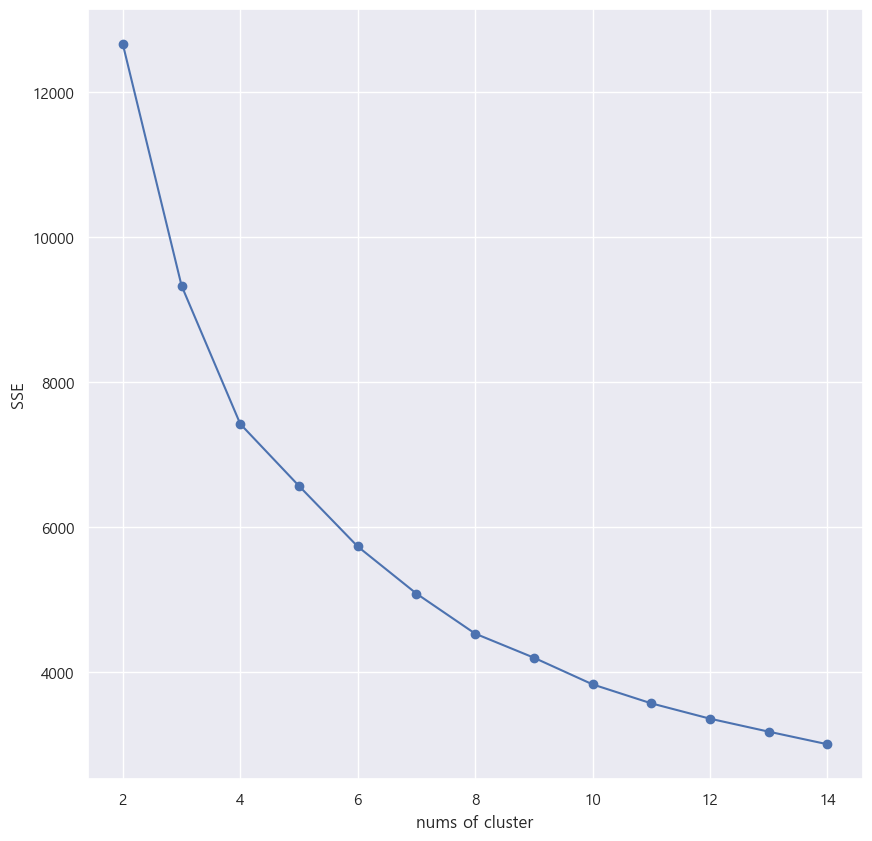

calinski-score 2 개 군집: 420.93647152945744
calinski-score 3 개 군집: 519.5682928392339
calinski-score 4 개 군집: 547.286628080464
calinski-score 5 개 군집: 506.1768237435412
calinski-score 6 개 군집: 501.7386750890123
calinski-score 7 개 군집: 499.0185480320911
calinski-score 8 개 군집: 502.26336369945534
calinski-score 9 개 군집: 486.7456379611652
calinski-score 10 개 군집: 487.8173628973118
calinski-score 11 개 군집: 480.43925803257224
calinski-score 12 개 군집: 471.3932716454469
calinski-score 13 개 군집: 462.1896947319064
calinski-score 14 개 군집: 456.73986143404295


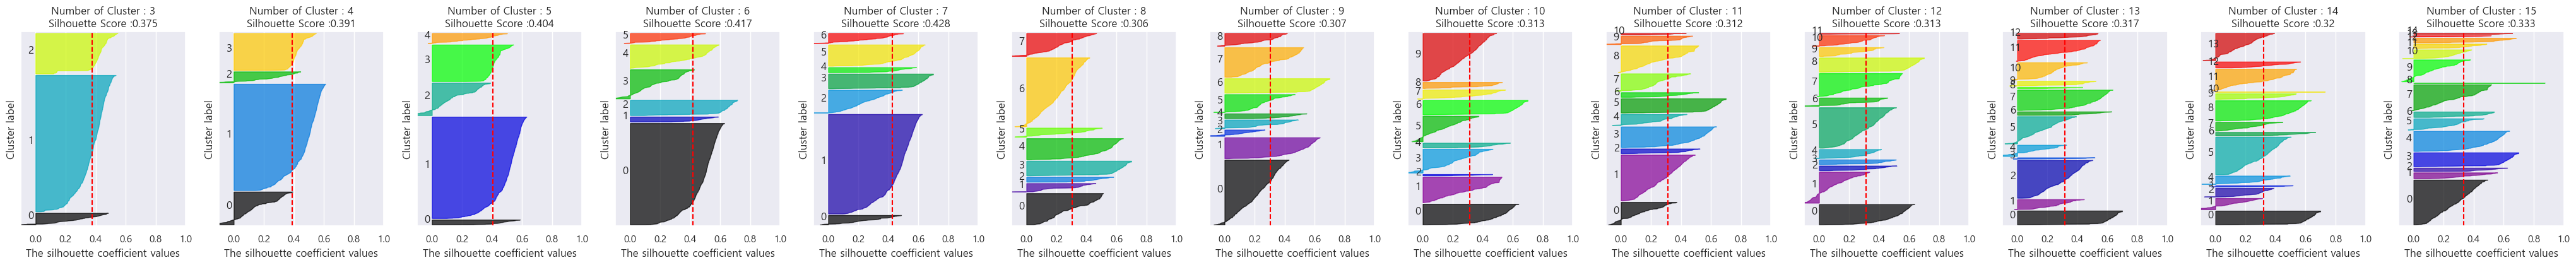

In [46]:
elbow_method(2, 15, pca_6_df)
visualize_silhouette([3,4,5,6,7,8,9,10,11,12,13,14,15],pca_6_df)
calinski_harabasz(2,15, pca_6_df)

- elbow method: 군집 개수 9개에서 기울기가 완만해지기 시작.
- calinski-score:  군집 개수 2~4, 9에서 calinski-score가 상승세. 
- 실루엣 계수: 모두 실루엣 계수가 낮지만, 군집 개수 10~11개가 군집 간 비율이 적절하게 나뉘어졌다고 생각.  
<br></br>
- 최종 군집 개수: 세개의 method를 모두 고려했을 때, Kmeans의 군집 개수는 10개가 가장 적당하다고 생각되어 8개로 결정.

In [47]:
df_kmeans = clustering_kmeans(pca_6_df,10,'k-means++',300,0)
kmeans_label = df_kmeans['kmeans_label']

df_kmeans_standard = df_similar[::]
df_kmeans_standard['kmeans_label'] = df_kmeans['kmeans_label'].values

In [51]:
folium_bus(None, None,None,df_kmeans_standard,'kmeans_label',"hybrid")

## 6-3. GMM

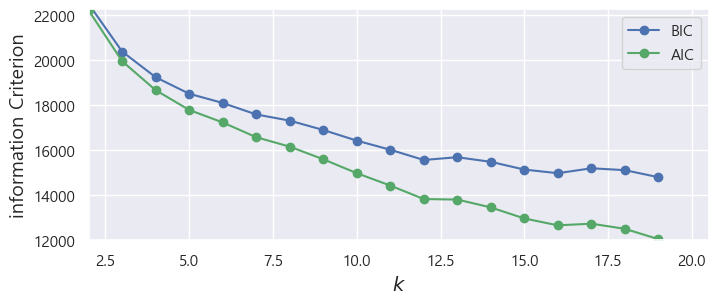

In [52]:
bic_aic(pca_6_df, 2, 20)

bic-aic 그래프에서 군집갯수가 11개일 때, 변곡점이므로 군집 갯수를 11개로 정함.

In [53]:
df_gmm = clustering_gmm(pca_6_df, 11, 42)
df_gmm

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  gmm_label
0    -0.707867 -0.299968 -0.787584 -0.055454  0.648526  0.995420          7
1    -0.630363 -0.176608 -1.352171 -0.415561  0.850213  0.171546          7
2    -0.687045 -0.279873 -0.864459 -0.078261  0.634682  0.987805          7
3    -0.544441 -0.167778 -1.101407 -0.077009  1.137501  0.738952          7
4    -0.561236 -0.217231 -0.770395  0.053938  1.042461  0.905232          7
...        ...       ...       ...       ...       ...       ...        ...
1310 -1.331268  3.316142  0.551998  0.159381  0.539710 -0.072554          2
1311 -1.577837  3.148518  0.417780 -0.273740 -0.382467 -0.210888          2
1312 -1.575152  3.167108  0.282355 -0.136147 -0.377983  0.317397          2
1313 -1.059913  3.174297  0.507238 -0.344595 -0.470316  0.293153          2
1314 -1.583684  3.114183  0.267335 -0.298574 -0.479230 -0.090766          2

[1315 rows x 7 columns]

In [54]:
df_gmm_robust_pca = df_similar.copy()
df_gmm_robust_pca['gmm_label']  = df_gmm['gmm_label'].values
df_gmm_robust_pca['gmm_label'].nunique()

11

In [55]:
folium_bus(None, None,None,df_gmm_robust_pca,'gmm_label',"hybrid")

## 6-4. DBSCAN

# ⭐dbscan 함수화

In [56]:
import pandas as pd 
DB_SCAN_daram_1400_df = pd.read_csv('cosine_similarity_daram.csv', encoding='UTF-8')
# 기본 정보들을 제외한 Feature와 Label을 나누기 
DB_Feature_df= DB_SCAN_daram_1400_df.loc[:,'academy_cnt':'population_15to64']
DB_Label_df = DB_SCAN_daram_1400_df['Label']

# 스케일링 종류별로 만들어 놓기 (Min_Max,Standard, Robust)

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(DB_Feature_df)

minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(DB_Feature_df)

robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(DB_Feature_df)

# PCA 하기 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

DB_pca_column_df = DB_SCAN_daram_1400_df.loc[:,'academy_cnt':'population_15to64']
DB_pca_column_df.head()
DB_pca_bus_df =StandardScaler().fit_transform(DB_pca_column_df)
pca = PCA(n_components=2)
pca.fit(DB_pca_bus_df)
DB_pca_transformed_df = pca.transform(DB_pca_bus_df)

DB_pca_pre_scatter_df=pd.DataFrame(DB_pca_transformed_df)

DB_ready_df=pd.concat([DB_pca_pre_scatter_df,DB_SCAN_daram_1400_df['Label']], axis=1)

In [ ]:
# 세개 다, pca 2

##### DBSCAN에서 최적의 파라미터를 찾기

In [60]:
# DBSACN 

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels = dbscan.fit_predict(DB_ready_df[[0,1]])

# eps과 min_samples를 변화시키면서 DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

column_length = DB_Feature_df.shape[1] 

eps_list = [1,3,5]
min_samples_list = [10,30,50,70]
method_list = ['Unscaled Data:', 'Standard Scaled Data:', 'Minmax Scaled Data:', 'Robust Scaled Data:']

pca_list = [2, 7, 8, 15]

for k in pca_list:
    pca = PCA(n_components=k)
    
    for i, data in enumerate([DB_Feature_df, standard_df, minmax_df, robust_df]):
        print(method_list[i])
        data_pca = pca.fit_transform(data)


        for eps in eps_list:
            for min_samples in min_samples_list:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                model = dbscan.fit(data_pca)
                labels = model.labels_
                unique_labels = set(labels)

                if -1 in unique_labels:
                    noise_exists = 1
                else:
                    noise_exists = 0

                n_clusters = len(unique_labels) - noise_exists

                if n_clusters > 1:
                    score = silhouette_score(data_pca, labels)
                    print(f'eps: {eps}, min_samples: {min_samples}, pca: {k}, Silhouette score: {score}')
                else:
                    print(f'eps: {eps}, min_samples: {min_samples}, pca: {k}, Silhouette score N/A for single cluster.')
        print("\n")

Unscaled Data:
eps: 1, min_samples: 10, pca: 2, Silhouette score: 0.959726937313412
eps: 1, min_samples: 30, pca: 2, Silhouette score: 0.5545177054498037
eps: 1, min_samples: 50, pca: 2, Silhouette score: 0.13170226235502486
eps: 1, min_samples: 70, pca: 2, Silhouette score: 0.29759808512311736
eps: 3, min_samples: 10, pca: 2, Silhouette score: 0.959726937313412


eps: 3, min_samples: 30, pca: 2, Silhouette score: 0.5545177054498037
eps: 3, min_samples: 50, pca: 2, Silhouette score: 0.13170226235502486
eps: 3, min_samples: 70, pca: 2, Silhouette score: 0.29759808512311736
eps: 5, min_samples: 10, pca: 2, Silhouette score: 0.959726937313412
eps: 5, min_samples: 30, pca: 2, Silhouette score: 0.5545177054498037
eps: 5, min_samples: 50, pca: 2, Silhouette score: 0.13170226235502486
eps: 5, min_samples: 70, pca: 2, Silhouette score: 0.29759808512311736


Standard Scaled Data:
eps: 1, min_samples: 10, pca: 2, Silhouette score N/A for single cluster.
eps: 1, min_samples: 30, pca: 2, Silhouette score: 0.498310708840146
eps: 1, min_samples: 50, pca: 2, Silhouette score N/A for single cluster.
eps: 1, min_samples: 70, pca: 2, Silhouette score N/A for single cluster.
eps: 3, min_samples: 10, pca: 2, Silhouette score N/A for single cluster.
eps: 3, min_samples: 30, pca: 2, Silhouette score N/A for single cluster.
eps: 3, min_samples: 50, pca: 2, Silhouette 

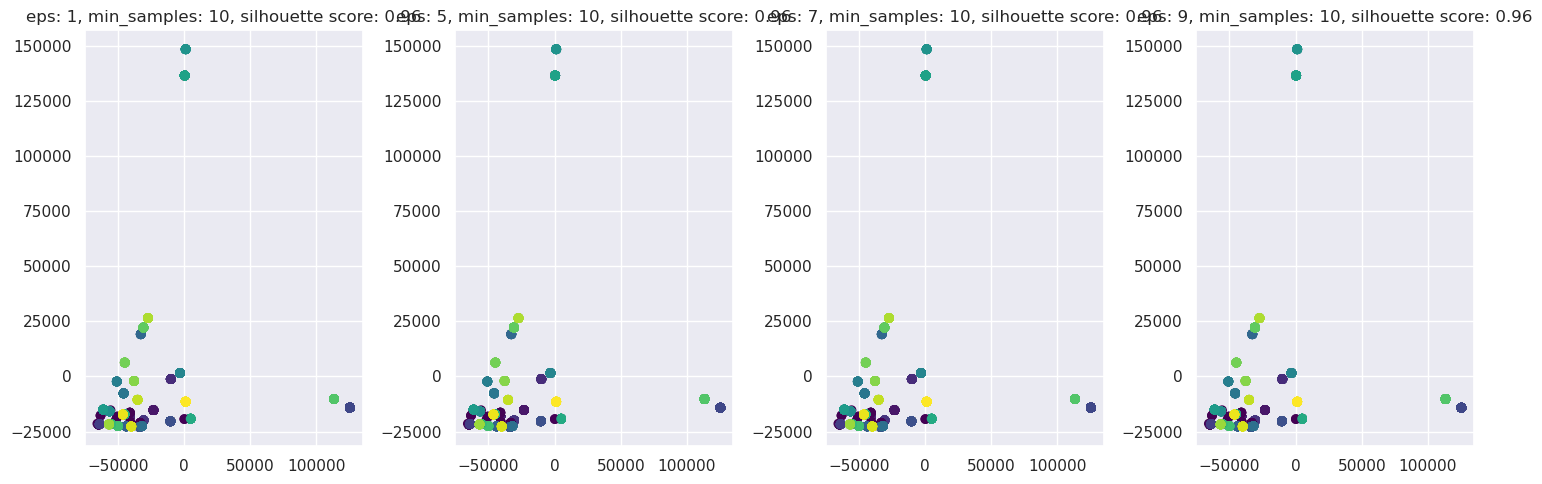

In [61]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

eps_list = [1, 5, 7, 9]
min_samples_list = [10]

pca = PCA(n_components=2)
feature_df_pca = pca.fit_transform(DB_Feature_df)

fig, axes = plt.subplots(1, len(eps_list), figsize=(15, 5))

for i, eps in enumerate(eps_list):
    for min_samples in min_samples_list:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(feature_df_pca)
        labels = clustering.labels_
        silhouette = round(silhouette_score(feature_df_pca, labels), 3)
        
        ax = axes[i]
        ax.scatter(feature_df_pca[:, 0], feature_df_pca[:, 1], c=labels, cmap='viridis')
        ax.set_title(f'eps: {eps}, min_samples: {min_samples}, silhouette score: {silhouette}')

plt.tight_layout()
plt.show()

여러가지 최적의 파라미터를 찾은 결과, 가장 높은 실루엣 스코어는 0.96이다.

In [62]:
DB_SCAN_Folium_df = DB_SCAN_daram_1400_df.assign(C=labels)

In [63]:
import folium

seoul_center = [37.5665, 126.9780]
seoul_map = folium.Map(location=seoul_center, zoom_start=12)

label_colors = {
    -1:  '#FFC0CB', 
     0:   '#0000FF',
     4:    '#008000',
     1:     '#FFA500',
     3:    '#FF0000', 
     5:    '#008080',
     2:    '#000080' 
   ''' 0: '#FFC0CB',   # pink
    1: '#0000FF',   # blue
    2: '#008000',   # green
    3: '#FFA500',   # orange
    4: '#800080',   # purple
    5: '#FF0000',   # red
    6: '#008080',   # skyblue
    7: '#000080'    # navy'''
}

folium_data = DB_SCAN_Folium_df[['X좌표', 'Y좌표', 'C']]

for index, rows in folium_data.iterrows():
    X, Y, label = rows['X좌표'], rows['Y좌표'], rows['C']
    fill_color = label_colors.get(label, '#FF0000')  # 지정되지 않은 라벨은 red로 설정
    folium.Circle(
        location=[Y, X],
        
        color=fill_color,
        fill=True,
        fill_opacity=0.4,
    ).add_to(seoul_map)

seoul_map


# Light Gray: #D3D3D3
# Dark Gray: #A9A9A9
# Brown: #A52A2A
# Yellow: #FFFF00
# Gold: #FFD700
# Cyan: #00FFFF
# Magenta: #FF00FF
# Lime: #00FF00
# Silver: #C0C0C0
# Teal: #008080
# Maroon: #800000
# Olive: #808000

# 6-5. clustering 결론

#### 1) 군집별 결과 비교  
|   |  GMM | KMEANS   | DBSCAN   |
|---|---|---|---|
|  군집결과 | <img src="GMM_Folium.png" width="400"> |  <img src="K-means_Folium.png" width="400">   |  <img src="DBSCAN_Folium.png" width="400">   |

해석 :  
GMM 
- 군집 11개 
- 노선에 따라서 군집이 잘됨
- 군집별 특성이 잘 보임 
  
K-Means
- 8개 군집
- 여러 클래스가 한 지역내에 뭉쳐있어, 군집별 특징이 뚜렷하지 않음.

DBSCAN  
- 군집 4개
- 군집의 변별력이 없음.



- 시도해본 clustering 종류: GMM, KMeans, DBscan 
- 세가지 clustering 중 군집 간의 변별력이 가장 높고 각 군집의 특성이 잘 보이는 clustering은 GMM이었다.
- ☑️최종 군집 방법 : GMM

#### 2) GMM 군집 결과 해석

##### GMM 군집별 특징

<img src="GMM_특징분석.png" width="700">

##### GMM 군집을 통해 추출한 기준3
- 기존 노선들의 군집을 살펴보니 아래의 사실을 발견.
  - 기점이 거주지인 노선 → 기점-종점의 클러스터 동일 or 상이
  - 기점이 거주지가 아닌 번화가, 업무지구인 노선  →  기점-종점의 클러스터가 반드시 상이

- 이 사실을 바탕으로 새로운 다람쥐 버스의 노선을 설정할 때 참고할 기준3을 설립.
  

<img src="./img/clustering_img3.png" width="800" height="400">

#### ✅기준: 
- 기점이 거주지일 때 → 기, 종점이 동일한 클러스터 or 기,종점이 서로 다른 클러스터.
- 기점이 거주지가 아닐 때 → 기, 종점이 반드시 서로 다른 클러스터여야 함. 

---

# 7. 기준에 따라서 후보 정류장 제거하기 
- 유사도로 뽑힌 후보 정류장들을 기준에 따라서 제거한다.

### ✅기준
- ##### 기준 1 : 새로운 다람쥐 버스 정류장은 기존 다람쥐 버스 정류장 같은 지역에 존재하면 안된다. 
- ##### 기준 2 : 기점,종점 인근에 지하철역이 적어도 하나 이상은 있어야한다. 
- ##### 기준 3 : 기점이 거주지가 아닐때, 기점과 종점이 반드시 서로 다른 클래스여야 한다. 

### 7-1. GMM 클러스터된 다람쥐 데이터 가져오기  
GMM 군집결과 총 11개의 클래스.

In [57]:
# gmm 다람쥐 csv 가져오기
gmm_daram_df = pd.read_csv('./Data/csv/gmm_daram.csv', encoding='UTF-8')
gmm_daram_df=gmm_daram_df[['X좌표','Y좌표','NODE_ID', 'gmm_cluster']]
gmm_daram_df

# 다람쥐 95개 정류장 csv 가져오기
daram_df = pd.read_csv('./Data/csv/다람쥐95개정류장.csv', encoding='cp949')

In [58]:
# gmm 클러스터링으로 라벨링된 데이터 확인하기 
gmm_daram_df

X좌표        Y좌표    NODE_ID  gmm_cluster
0     126.918884  37.521891  118000076            0
1     126.930759  37.525932  118000613            0
2     126.893399  37.476205  117900029            0
3     126.924904  37.530782  118000051            0
4     126.920853  37.527967  118000196            0
...          ...        ...        ...          ...
1310  127.000648  37.593218  107000140           10
1311  126.897552  37.518672  118900051           10
1312  126.995944  37.593745  107000137           10
1313  127.001531  37.593272  107000141           10
1314  126.901319  37.514334  118000104           10

[1315 rows x 4 columns]

### 7-2. 유사도 데이터 확인 

In [59]:
cosine_daram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 35 to 12421
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              1315 non-null   object
 1   Unnamed: 0         1315 non-null   object
 2   NODE_ID            1315 non-null   object
 3   정류소명               1315 non-null   object
 4   X좌표                1315 non-null   object
 5   Y좌표                1315 non-null   object
 6   법정동코드              1315 non-null   object
 7   법정동_구              1315 non-null   object
 8   법정동                1315 non-null   object
 9   academy_cnt        1315 non-null   object
 10  kindergarten_cnt   1315 non-null   object
 11  mart_cnt           1315 non-null   object
 12  restaurant_cnt     1315 non-null   object
 13  school_cnt         1315 non-null   object
 14  university_cnt     1315 non-null   object
 15  subway_cnt         1315 non-null   object
 16  tour_cnt           1315 non-null   objec

### 7-3. 95개 다람쥐 버스 정류장에 gmm 군집결과 merge

In [60]:
gmm_daram_result_df = pd.merge(cosine_daram_df,gmm_daram_df, left_on='NODE_ID' ,right_on='NODE_ID',how='left')
gmm_daram_result_df.info()e

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1314
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1315 non-null   object 
 1   Unnamed: 0         1315 non-null   object 
 2   NODE_ID            1315 non-null   object 
 3   정류소명               1315 non-null   object 
 4   X좌표_x              1315 non-null   object 
 5   Y좌표_x              1315 non-null   object 
 6   법정동코드              1315 non-null   object 
 7   법정동_구              1315 non-null   object 
 8   법정동                1315 non-null   object 
 9   academy_cnt        1315 non-null   object 
 10  kindergarten_cnt   1315 non-null   object 
 11  mart_cnt           1315 non-null   object 
 12  restaurant_cnt     1315 non-null   object 
 13  school_cnt         1315 non-null   object 
 14  university_cnt     1315 non-null   object 
 15  subway_cnt         1315 non-null   object 
 16  tour_cnt           1315 

In [61]:
cosine_daram_df['구-동']=cosine_daram_df['법정동_구']+cosine_daram_df['법정동']
daram_df['구-동']=daram_df['법정동_구']+daram_df['법정동']

### 7-3. GMM 클러스터링된 코사인 유사도에서 후보군 제거 

In [62]:
gmm_daram_df

X좌표        Y좌표    NODE_ID  gmm_cluster
0     126.918884  37.521891  118000076            0
1     126.930759  37.525932  118000613            0
2     126.893399  37.476205  117900029            0
3     126.924904  37.530782  118000051            0
4     126.920853  37.527967  118000196            0
...          ...        ...        ...          ...
1310  127.000648  37.593218  107000140           10
1311  126.897552  37.518672  118900051           10
1312  126.995944  37.593745  107000137           10
1313  127.001531  37.593272  107000141           10
1314  126.901319  37.514334  118000104           10

[1315 rows x 4 columns]

In [63]:
gmm_daram_result_df['구-동']=gmm_daram_result_df['법정동_구']+gmm_daram_result_df['법정동']
# 기존 다람쥐 버스 (95개)가 있는 동을 리스트로 뽑기 
daram_95_gu_list = daram_df['법정동_구'].drop_duplicates().tolist()
daram_95_gu_dong_list = daram_df['구-동'].drop_duplicates().tolist()
daram_95_gu_dong_list

['동대문구장안동',
 '동대문구답십리동',
 '송파구신천동',
 '송파구방이동',
 '송파구오금동',
 '송파구마천동',
 '강남구수서동',
 '강남구세곡동',
 '강남구자곡동',
 '동작구노량진동',
 '동작구상도동',
 '관악구봉천동',
 '관악구신림동',
 '마포구창전동',
 '마포구노고산동',
 '영등포구여의도동',
 '은평구신사동',
 '은평구응암동',
 '은평구구산동',
 '은평구역촌동']

In [64]:
# 불필요한 컬럼 삭제 
gmm_daram_result_df=gmm_daram_result_df.drop(['X좌표_y','Y좌표_y'], axis=1)
gmm_daram_result_df.rename(columns={'X좌표_x':'X좌표','Y좌표_x' :'Y좌표'}, inplace=True)
gmm_daram_result_df.head()

index Unnamed: 0    NODE_ID       정류소명         X좌표        Y좌표       법정동코드  \
0    35         35  100000037  국민은행세검정지점  126.960888  37.604663  1111018600   
1    36         36  100000038    세검정초등학교   126.96122  37.602502  1111018600   
2    37         37  100000039    세검정.상명대  126.958722  37.600733  1111018500   
3    38         38  100000040  상명대입구.석파랑   126.95857  37.599413  1111018500   
4    39         39  100000041        하림각  126.961707  37.598133  1111018400   

  법정동_구  법정동 academy_cnt  ... public_office_cnt employee_cnt alone_ratio  \
0   종로구  신영동          31  ...                 1         1255    0.123238   
1   종로구  신영동          31  ...                 2         1255    0.123238   
2   종로구  홍지동          25  ...                 1         1255    0.123238   
3   종로구  홍지동          10  ...                 1         1255    0.123238   
4   종로구  부암동          13  ...                 1         1255    0.123238   

  emp_corp_ratio population_15to64 RIDE_SUM_6_10 ALIGHT_SUM_6_10 Label  \
0       4.297945              2188         80082           39699     0   
1       4.297945              2188        254790           99879     0   
2       4.297945              2188         19894           46761     0   
3       4.297945              2188         48158           19098     0   
4       4.297945              2188        154700           45650     0   

  gmm_cluster     구-동  
0           6  종로구신영동  
1           6  종로구신영동  
2           6  종로구홍지동  
3           6  종로구홍지동  
4           6  종로구부암동  

[5 rows x 31 columns]

### 기준1을 통해 후보 정류장 제거 
기준 1 : 다람쥐 버스는 같은 동이나 구, 또는 근접한 지역이 아니여야한다.

In [89]:
# 다람쥐 버스가 있던 동 제거
drop_cosine_daram_df = gmm_daram_result_df[~gmm_daram_result_df['구-동'].isin(daram_95_gu_dong_list)]
# 다람쥐 버스가 있던 구 제거
drop_gu_cosine_daram_df = drop_cosine_daram_df[~drop_cosine_daram_df['법정동_구'].isin(daram_95_gu_list)]

In [90]:
visualize_similar_gmm_map('select_no_home_zone_cosine_similiarity.html',drop_gu_cosine_daram_df)

### 2. 기준2를 통해 후보 정류장 제거 
기준2 : 다람쥐 버스는 기점 종점 모두 합쳐 최소 1개 이상의 지하철역이 있어야한다.

In [91]:
# 동이 뭐가 있는지 보기
region_list=drop_cosine_daram_df['법정동'].drop_duplicates().tolist()
region_list

['신영동',
 '홍지동',
 '부암동',
 '와룡동',
 '행촌동',
 '광장동',
 '전농동',
 '회기동',
 '중화동',
 '석관동',
 '성북동',
 '상암동',
 '홍은동',
 '도화동',
 '중동',
 '염창동',
 '등촌동',
 '내발산동',
 '외발산동',
 '가산동',
 '문래동1가',
 '문래동2가',
 '신길동',
 '문래동3가',
 '문래동6가',
 '문래동4가',
 '문래동5가',
 '본동',
 '상도1동',
 '사당동',
 '양재동',
 '신사동',
 '압구정동',
 '율현동',
 '둔촌동',
 '천호동']

In [92]:
drop_list_1=[
 '전농동',
 '회기동',
 '중화동',
 '도화동',
 '문래동1가',
 '문래동2가',
 '신길동',
 '문래동3가',
 '문래동6가',
 '문래동4가',
 '문래동5가',
 '본동',
 '상도1동',
 '사당동',
 '율현동',
 '신사동', 
 '압구정동'
 '성북동',
 '신영동',
 '홍지동',
 '광장동',
 '홍은동',
 '부암동',
 '행촌동',
 '와룡동',
 '석관동',
 '염창동',
 '중동',
 '성북동'
 ]


In [93]:
# 기존 다람쥐 버스 정류장과 가까운 남아잇는 군집 제거
drop_dong_2km_daram_df = drop_cosine_daram_df[~drop_cosine_daram_df['법정동'].isin(drop_list_1)]

In [94]:
visualize_similar_gmm_map('standard2_cosine_similiarity.html',drop_dong_2km_daram_df)

기준 2 제거 결과

### 3. 기준 3을 통해 후보 정류장 제거  
기준3 : 기점이 주거지일 때, 기점과 종점의 클래스가 달라야 한다. 

In [95]:
drop_list_2=[
'가산동',
'압구정동'
 ]

In [96]:
# 기점과 종점이 같은 클래스인 지역 제거
not_same_class_dong_df = drop_dong_2km_daram_df[~drop_cosine_daram_df['법정동'].isin(drop_list_2)]

In [97]:
visualize_similar_gmm_map('standard3_cosine_similiarity.html',not_same_class_dong_df)

### EDA_1 정리
 
|  기준1 |기준2   |기준3   |
|---|---|---|
| <img src="Standard1_EDA1.png" width="500">  | <img src="Standard2_EDA1.png" width="500">  |  <img src="Standard3_EDA1.png" width="500"> |

EDA1을 통해 최종 결정된 지역은 총 3군데이다.
1. 강서지구 
2. 서초지구
3. 강동지구 

